# Časové vizualizace



# Line chart

Text(0.5, 1.0, 'Flights in May')

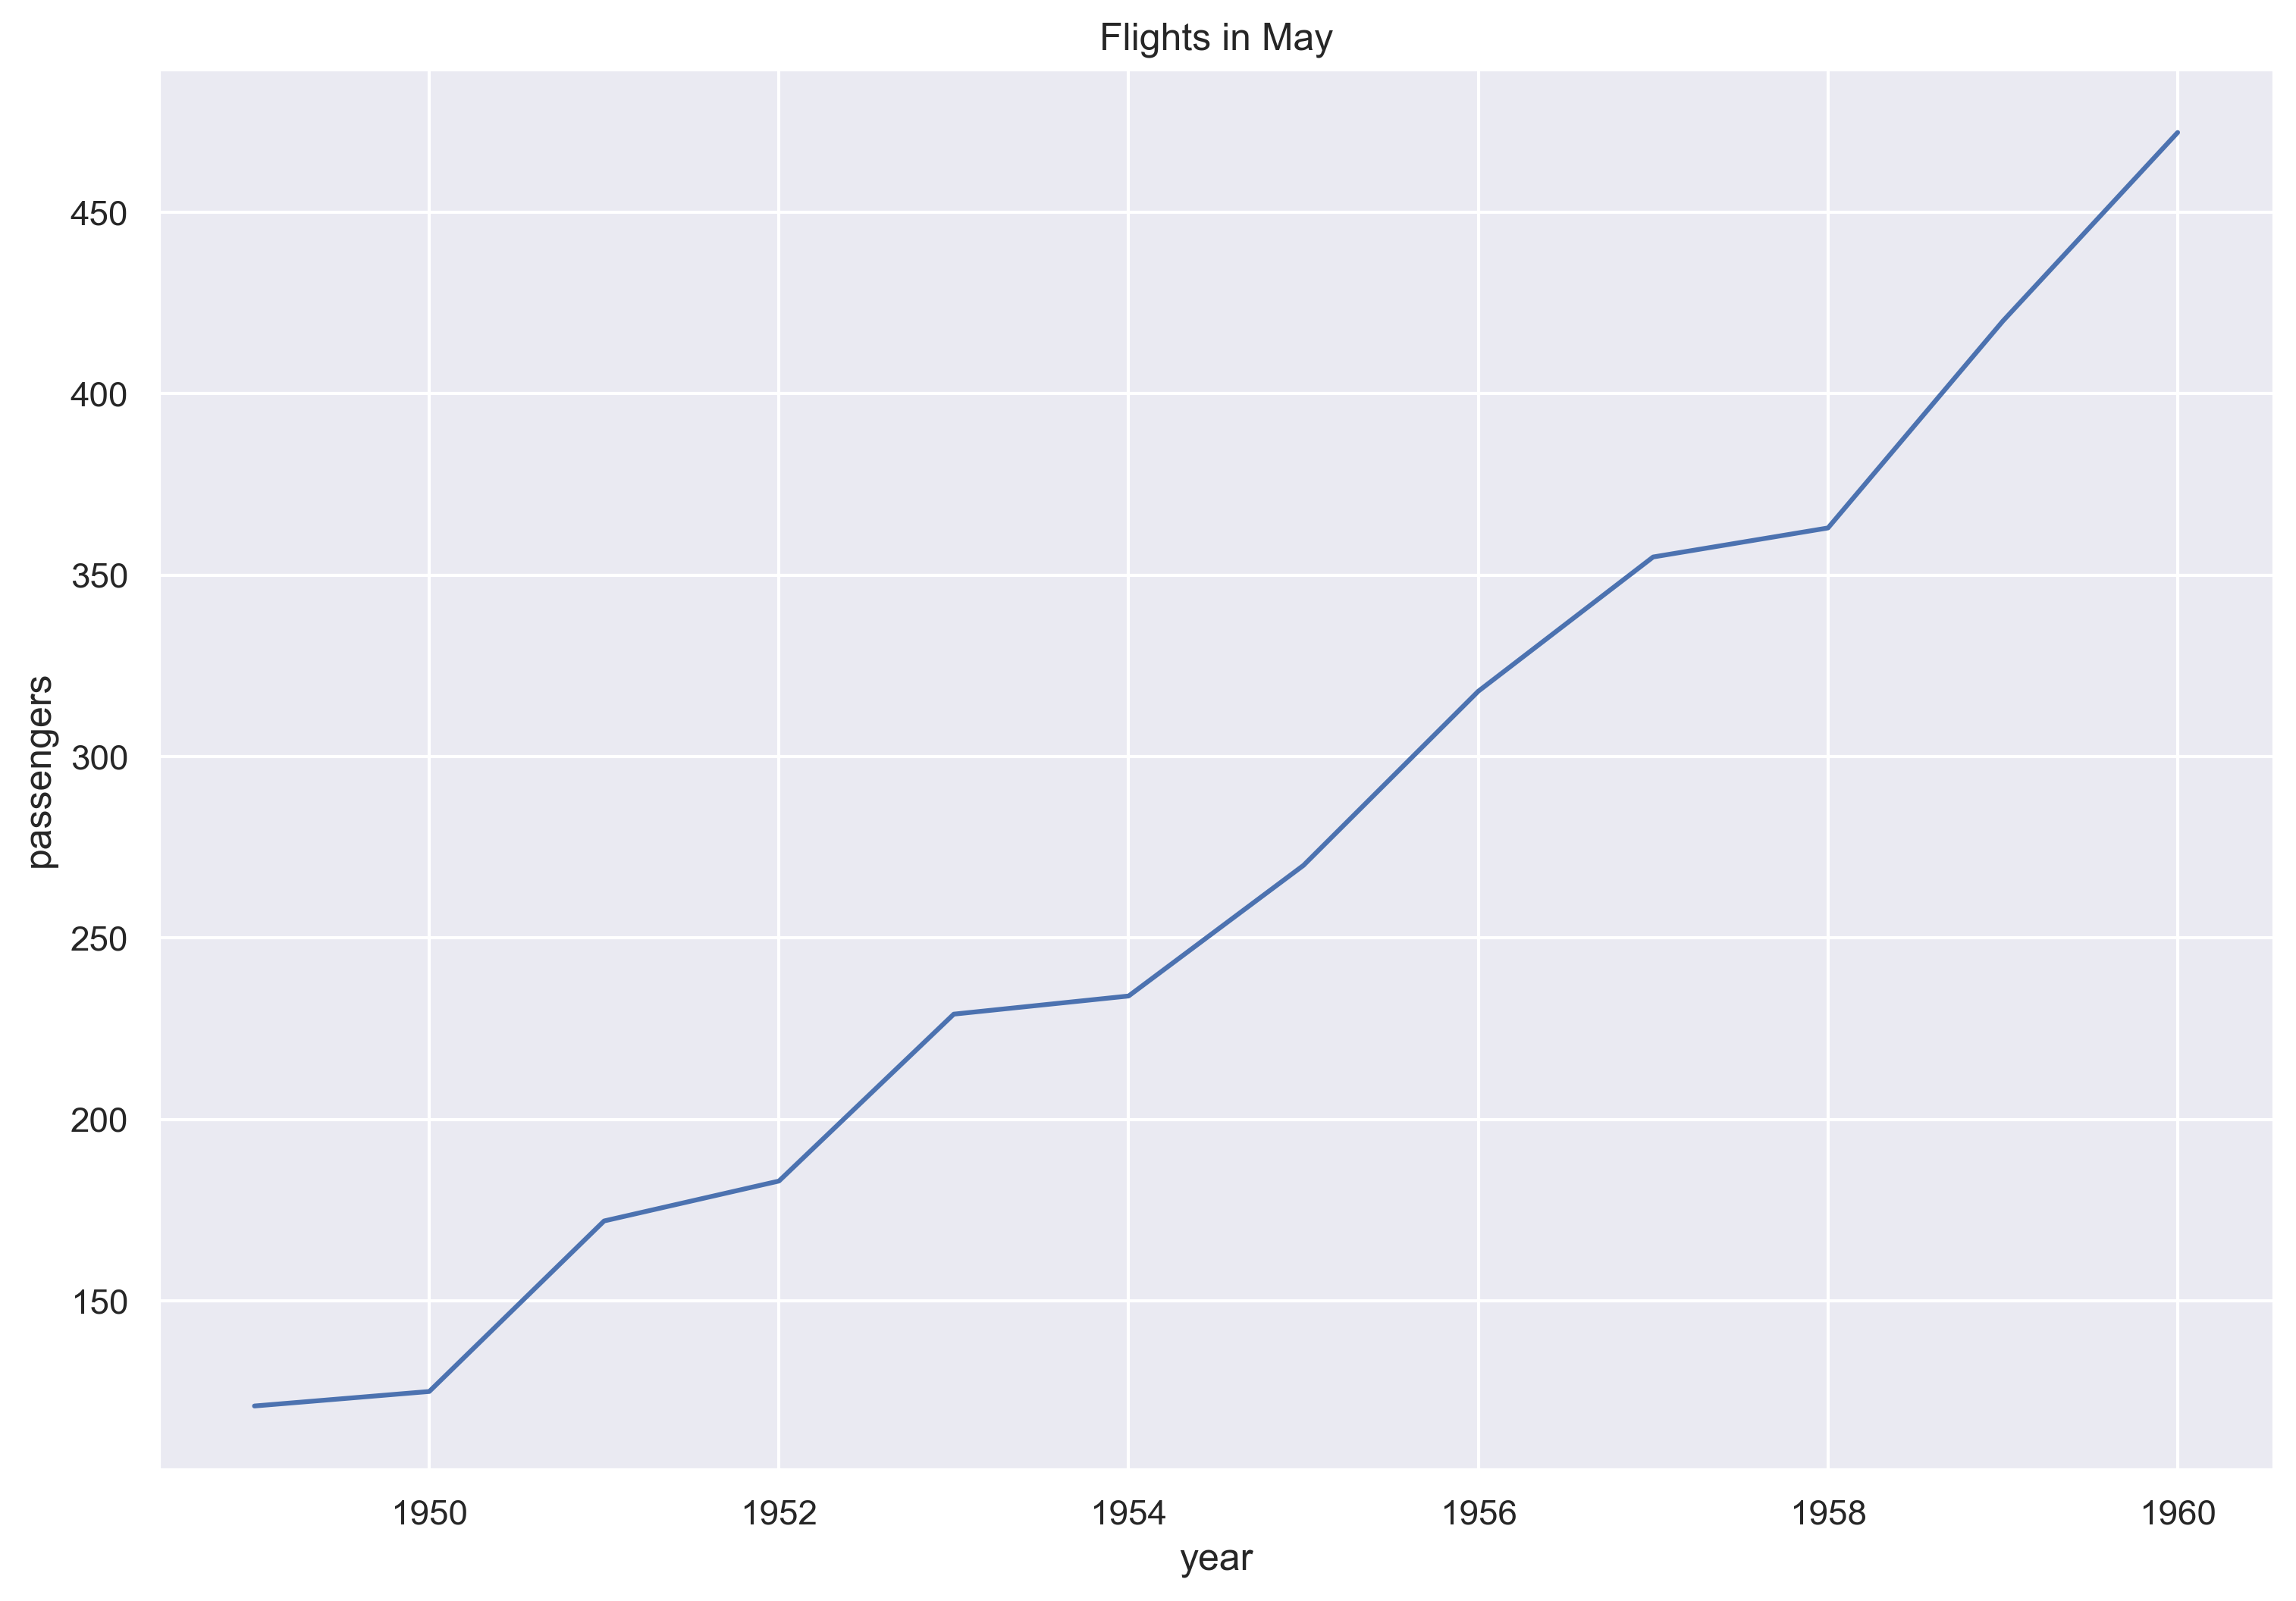

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
df = pd.read_csv("data/flights.csv")
may_flights = df.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")
plt.title("Flights in May")

# Stacked area chart

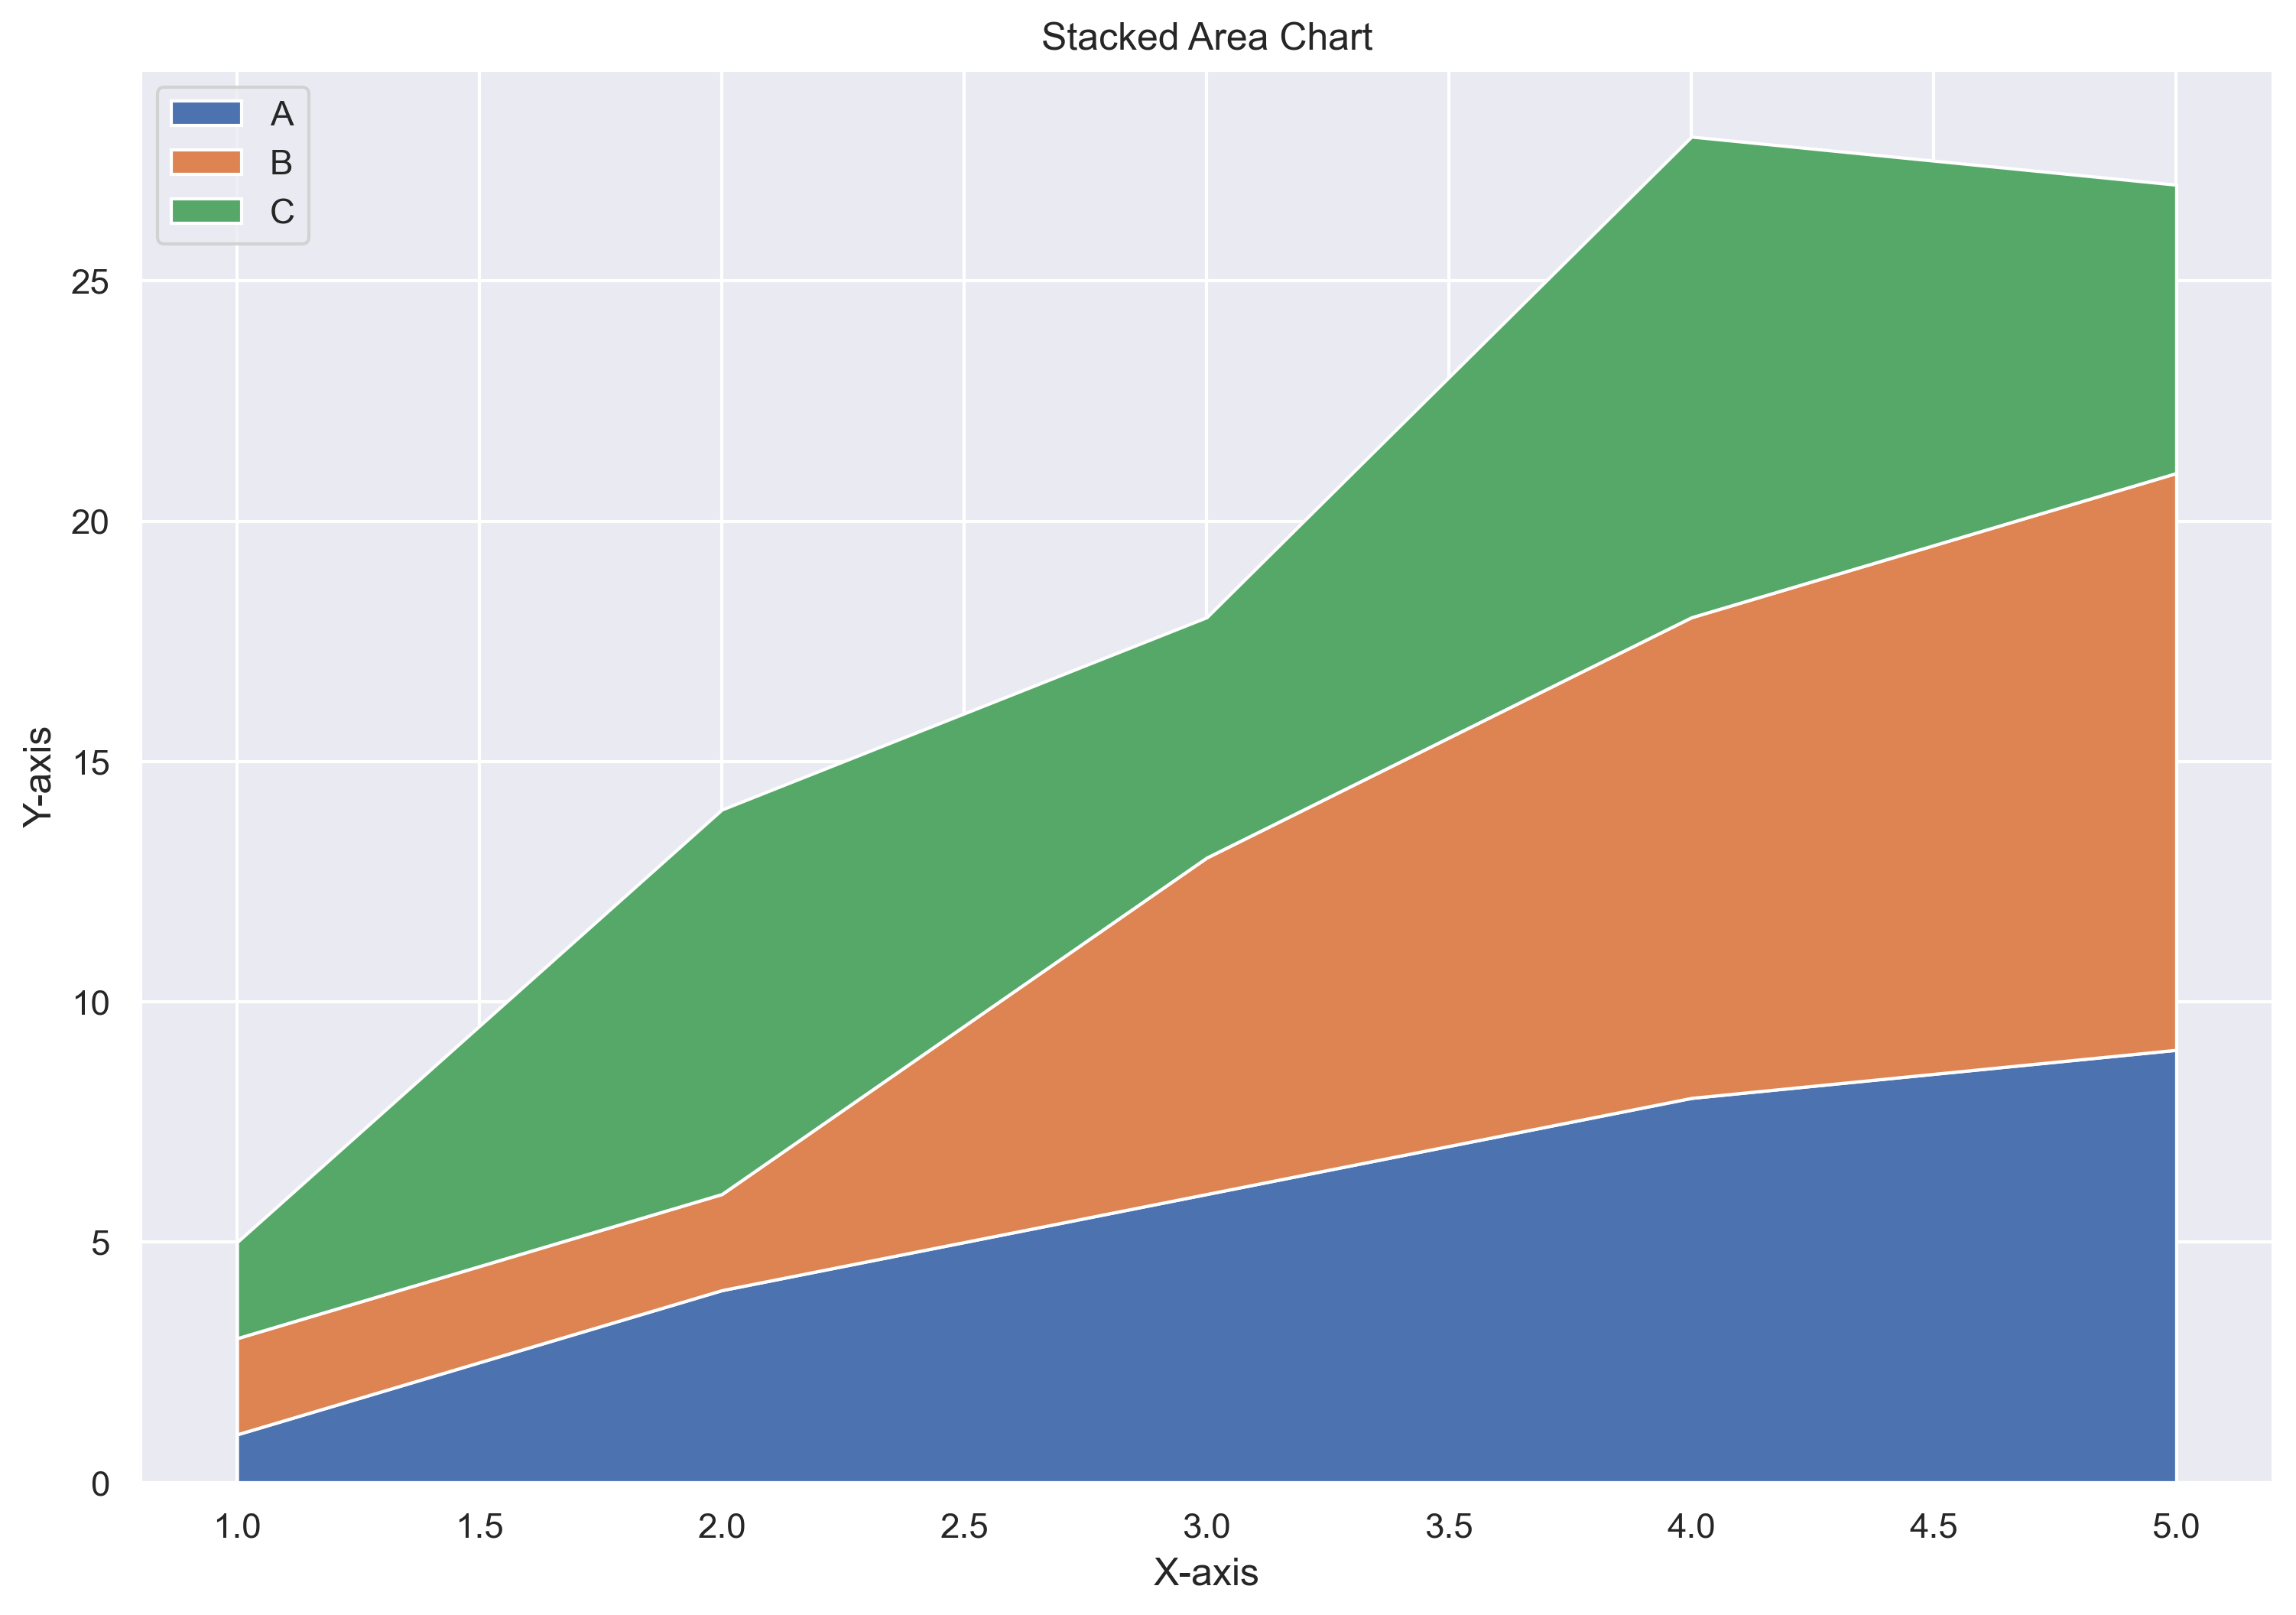

In [140]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn style
sns.set_theme()
 
# Data
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
labels = ['A','B','C']
# Plot
plt.stackplot(x,y, labels=labels)
plt.legend(loc='upper left')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Stacked Area Chart')
plt.show()

# Relační vizualizace

# Pie chart

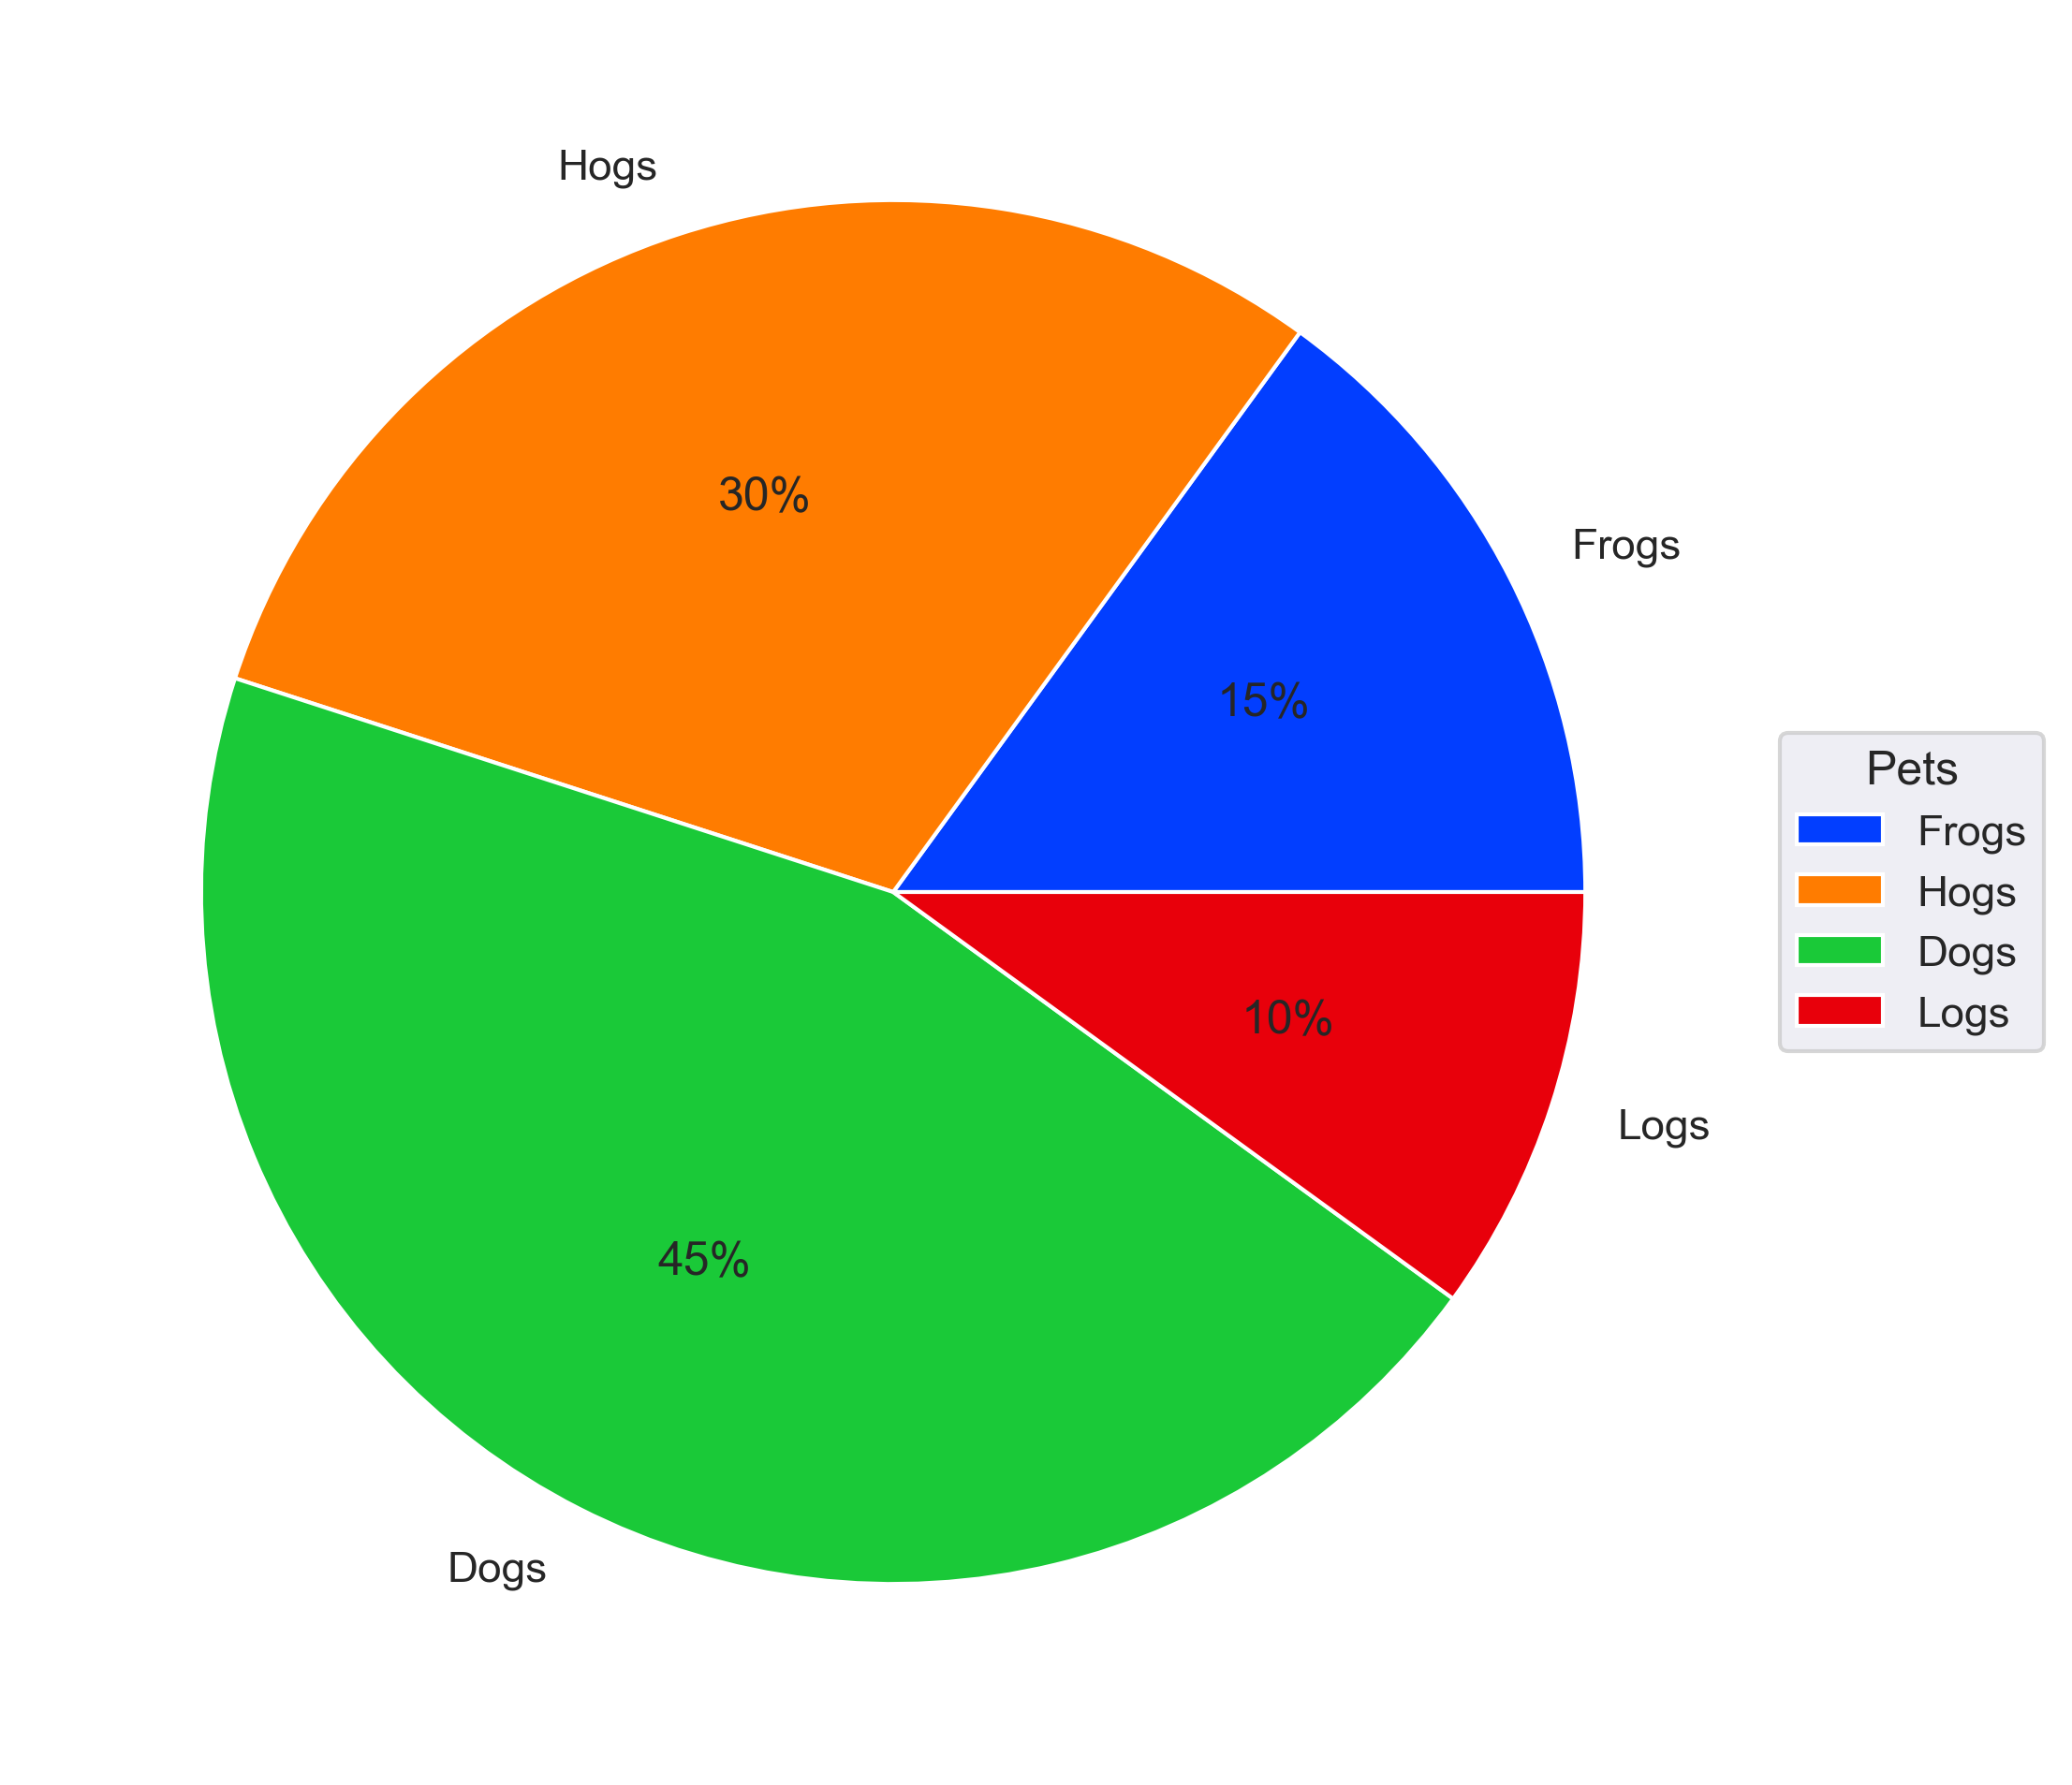

In [141]:
# importing libraries 
import matplotlib.pyplot as plt 
import seaborn 
  
# declaring data 
data = [15, 30, 45, 10] 
keys = ['Frogs', 'Hogs', 'Dogs', 'Logs'] 
  
# define Seaborn color palette to use 
palette_color = seaborn.color_palette('bright') 
  
# plotting data on chart 
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%') 

# Add legend
plt.legend(title="Pets", labels=keys, loc='center left', bbox_to_anchor=(1, 0.5)) 
#needs parameter so legend does not overlap with figure
  
# displaying chart 
plt.show() 

# Donut chart

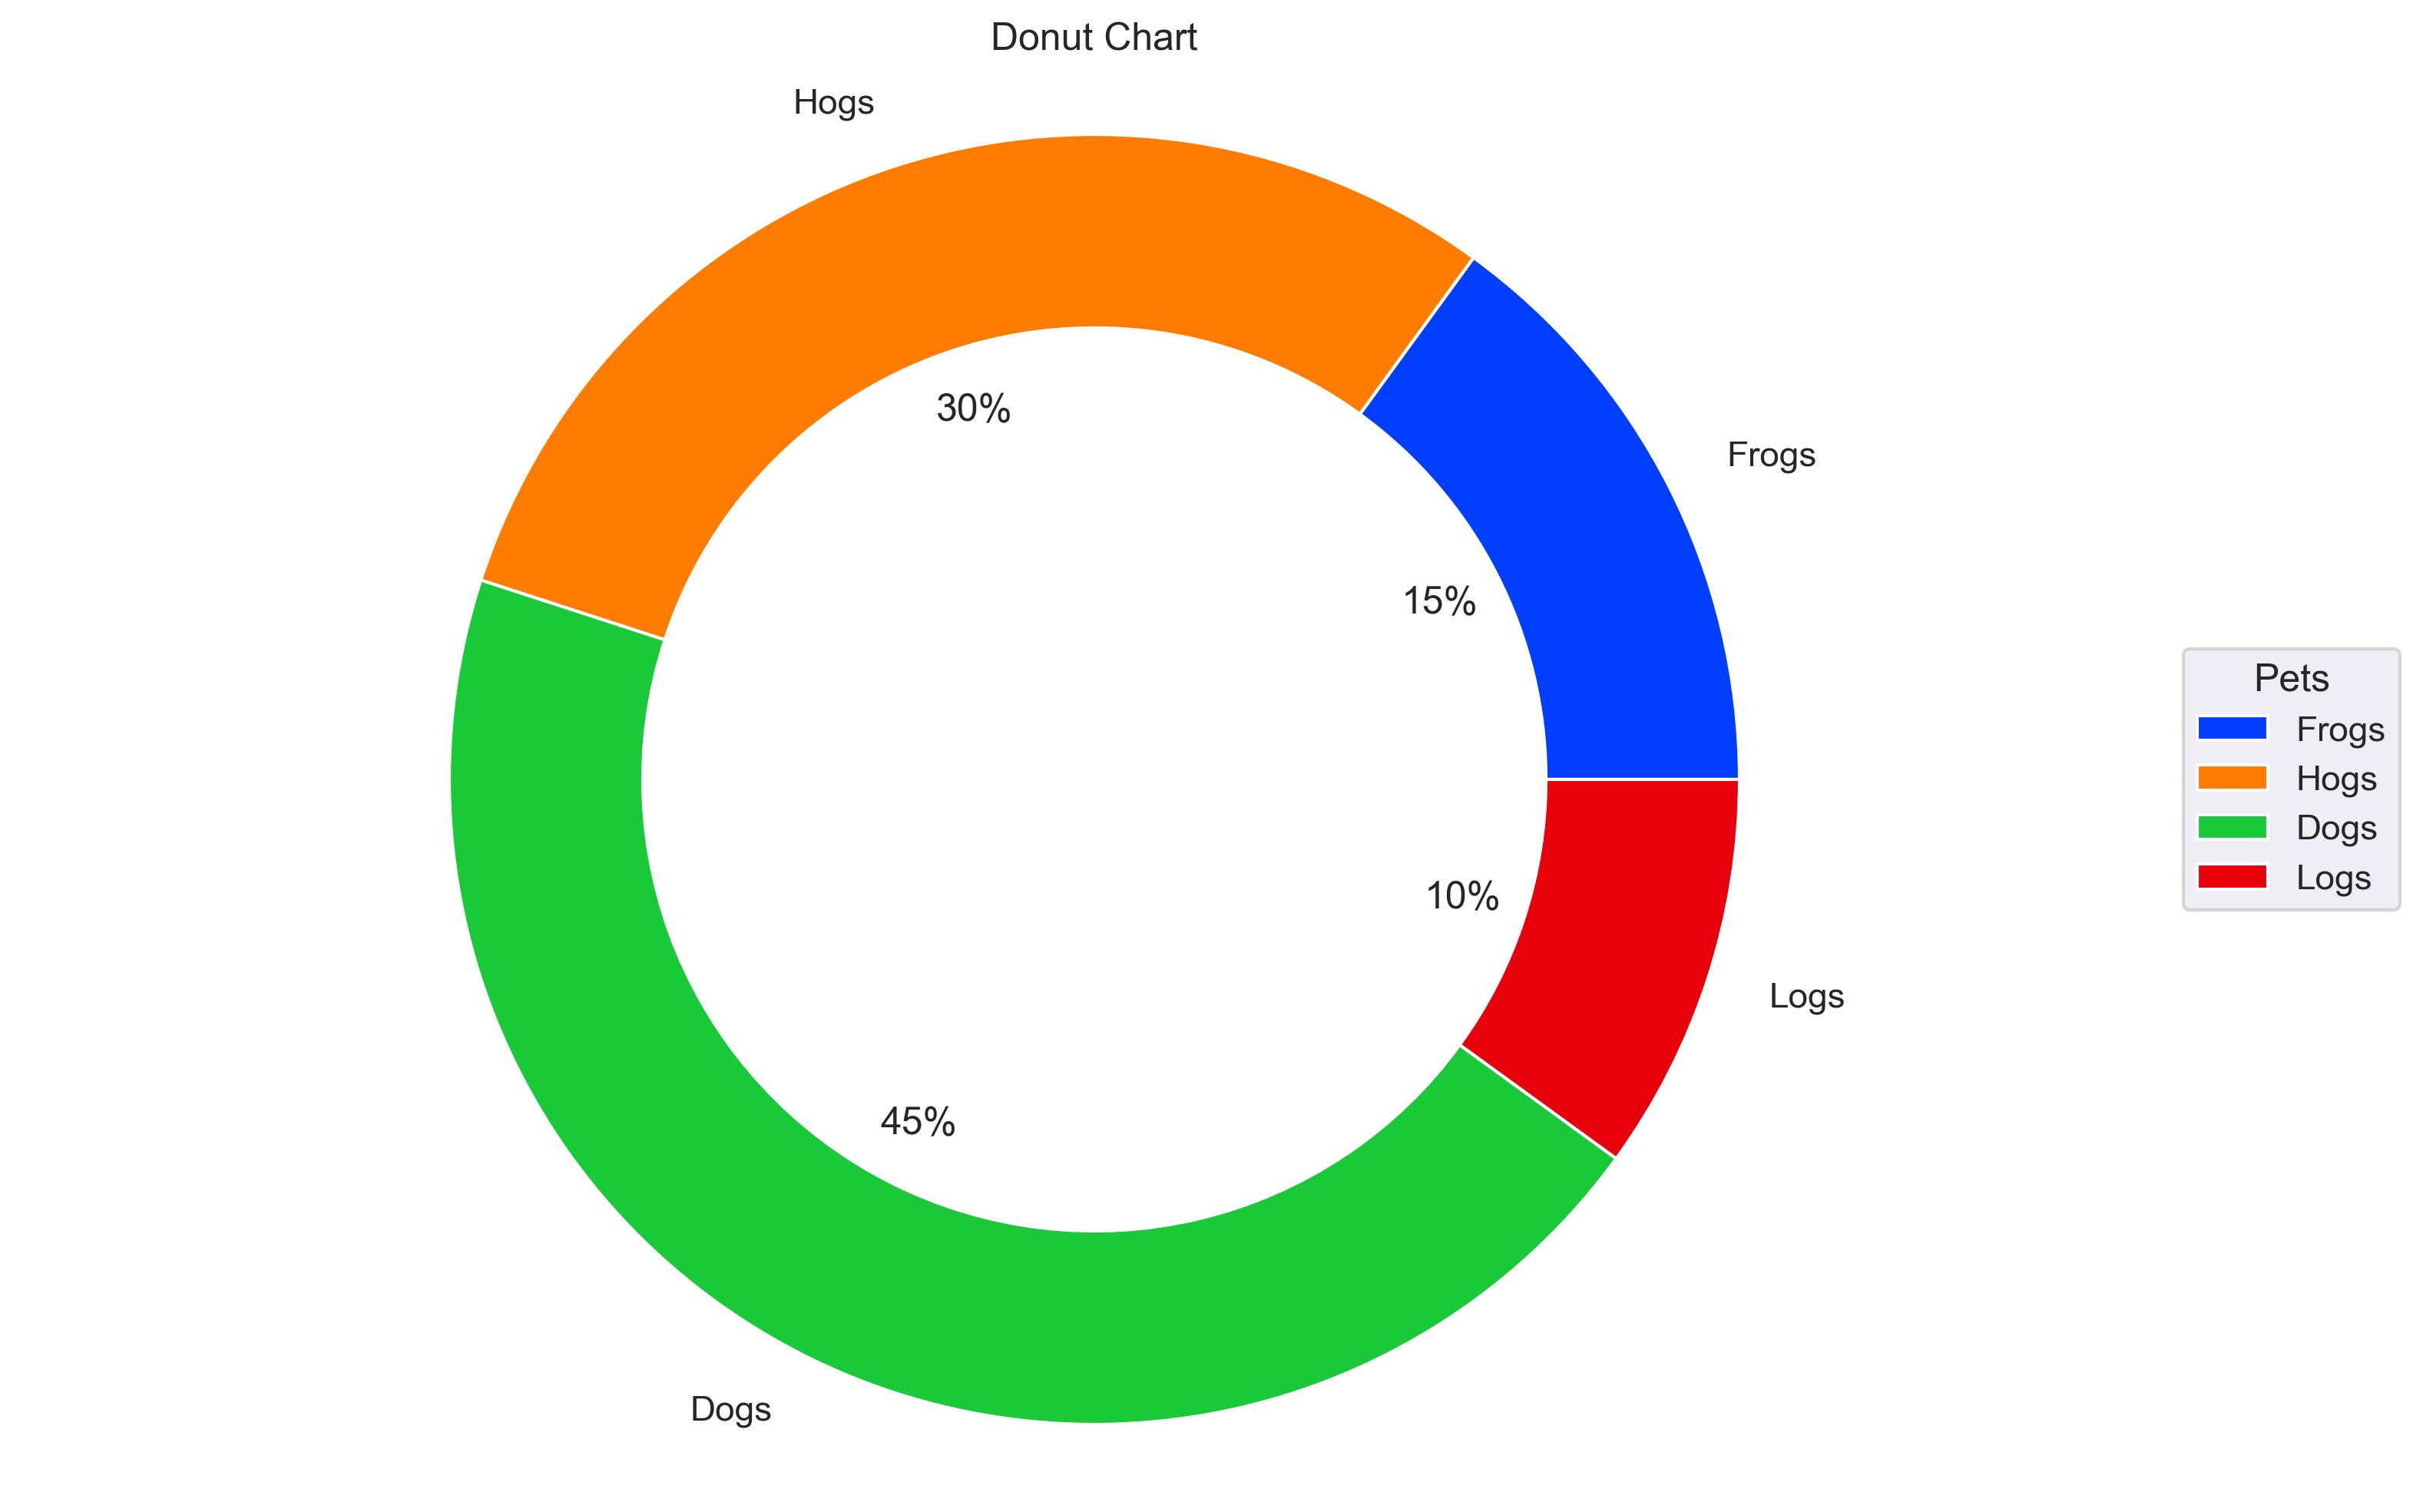

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# declaring data 
data = [15, 30, 45, 10] 
keys = ['Frogs', 'Hogs', 'Dogs', 'Logs'] 

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# create a figure and axis object
fig, ax = plt.subplots()

# plot the pie chart
wedges, texts, autotexts = ax.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%', wedgeprops=dict(width=0.3))

# add legend
ax.legend(wedges, keys, title="Pets", loc='center left', bbox_to_anchor=(1, 0.5))

# set title
plt.title("Donut Chart")

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# display chart
plt.show()


# Scatter plot matrix

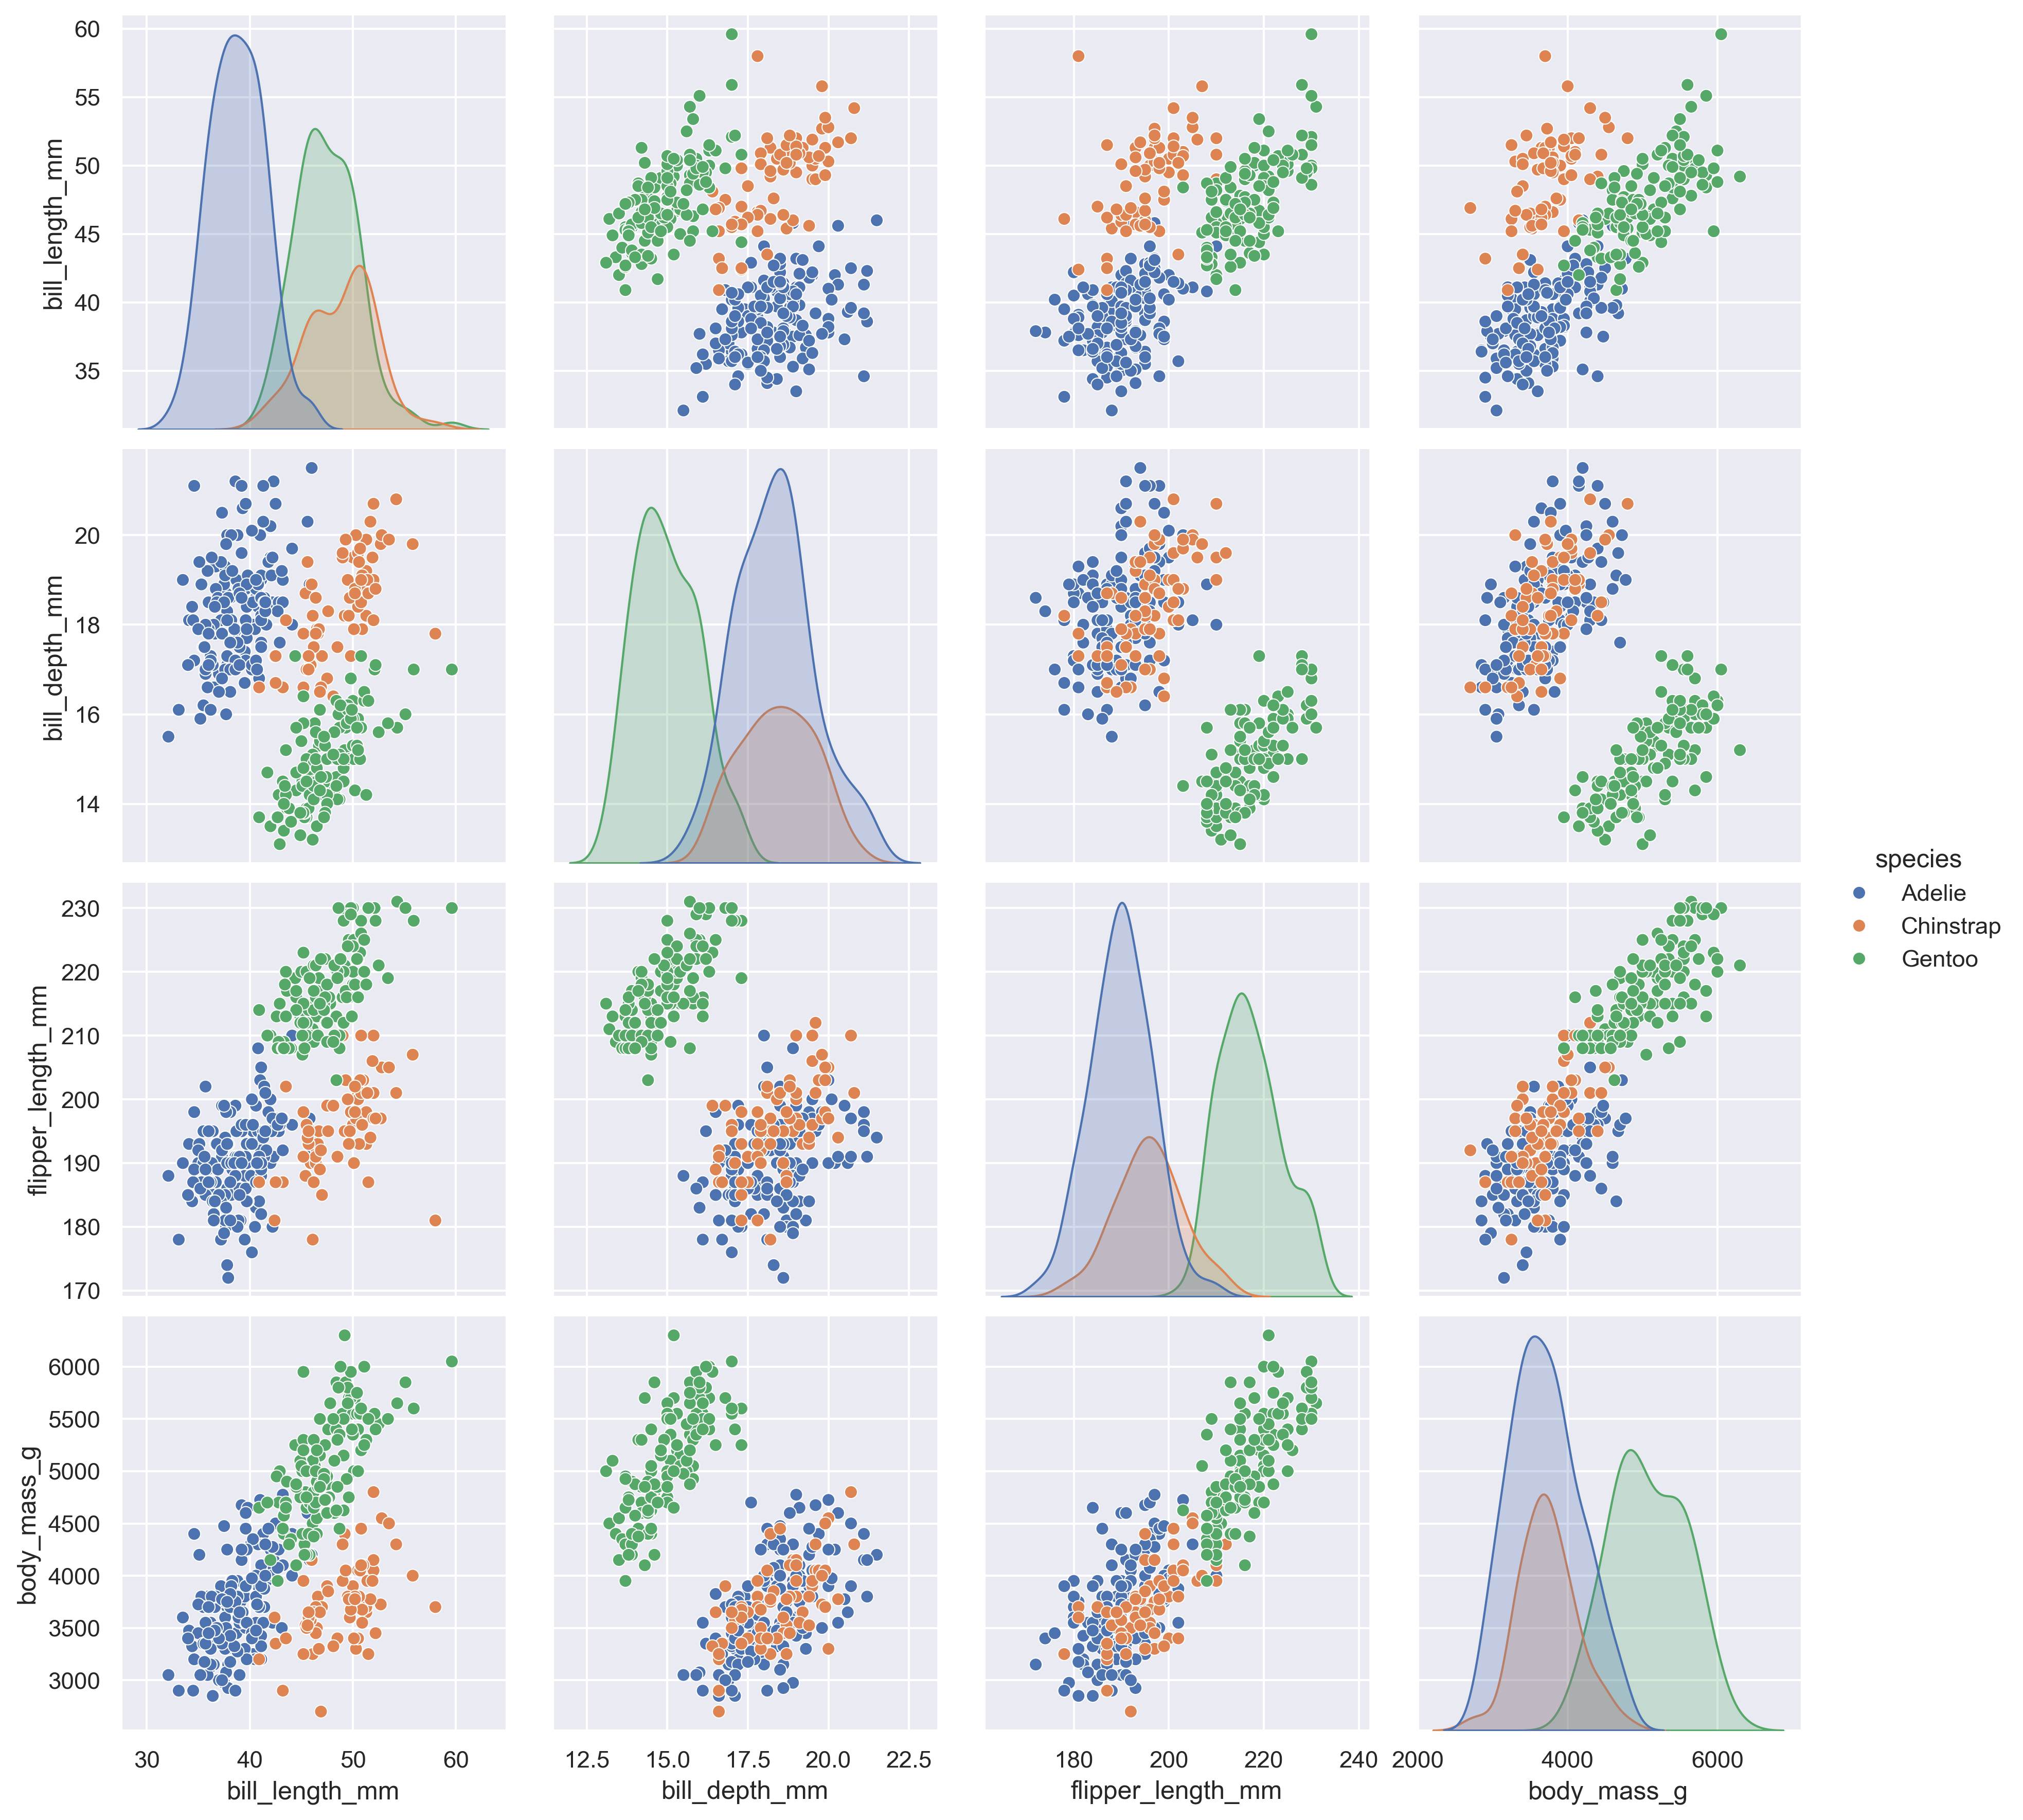

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("data/penguins.csv")

sns.pairplot(df, hue = "species", height=3)

# Vizualizace rozdělení

# Population pyramid

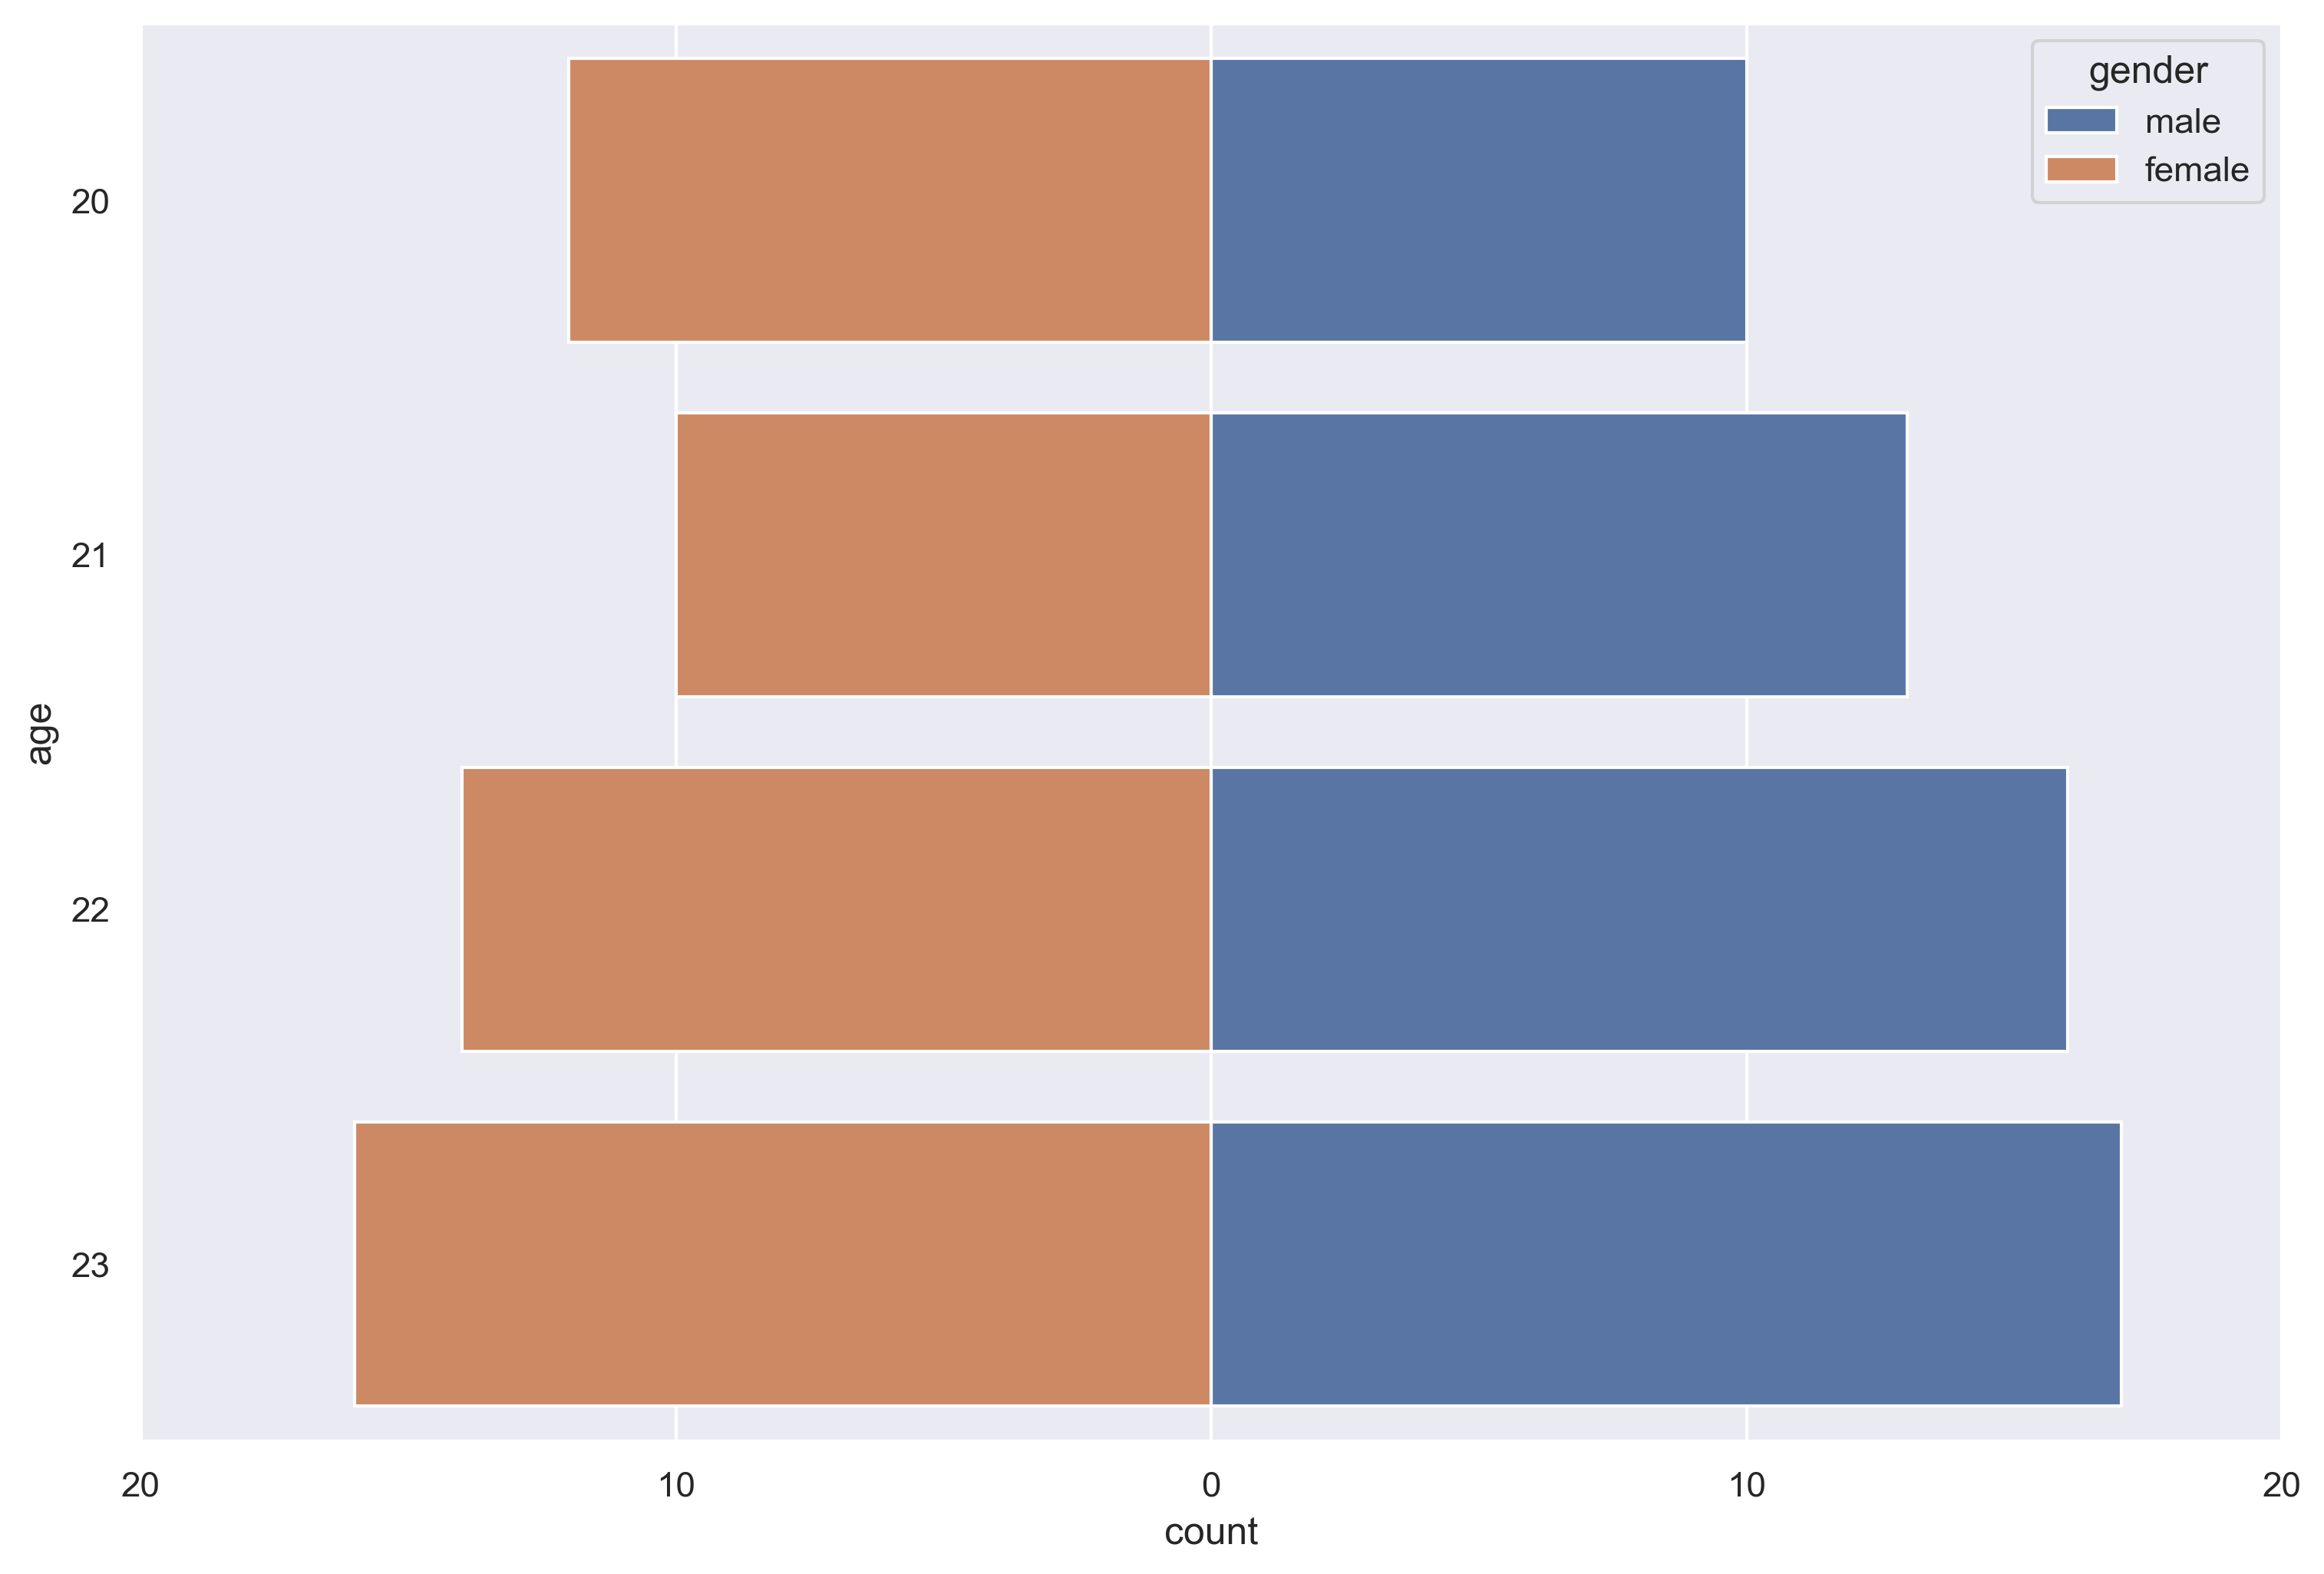

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

testdata = pd.DataFrame({'age': [20, 20, 21, 21, 22, 22, 23, 23],
                'gender': ["male", "female", "male", "female", "male", "female", "male", "female"],
                'count': [10, 12, 13, 10, 16, 14, 17, 16]})

# Make female counts negative
testdata.loc[testdata['gender'] == 'female', 'count'] *= -1

sns.barplot(data=testdata, x='count', y='age',
            hue='gender', orient='horizontal', 
            dodge=False)

# Set x-axis labels
plt.xticks([-20, -10, 0, 10, 20], [20, 10, 0, 10, 20])

plt.show()

# Histogram

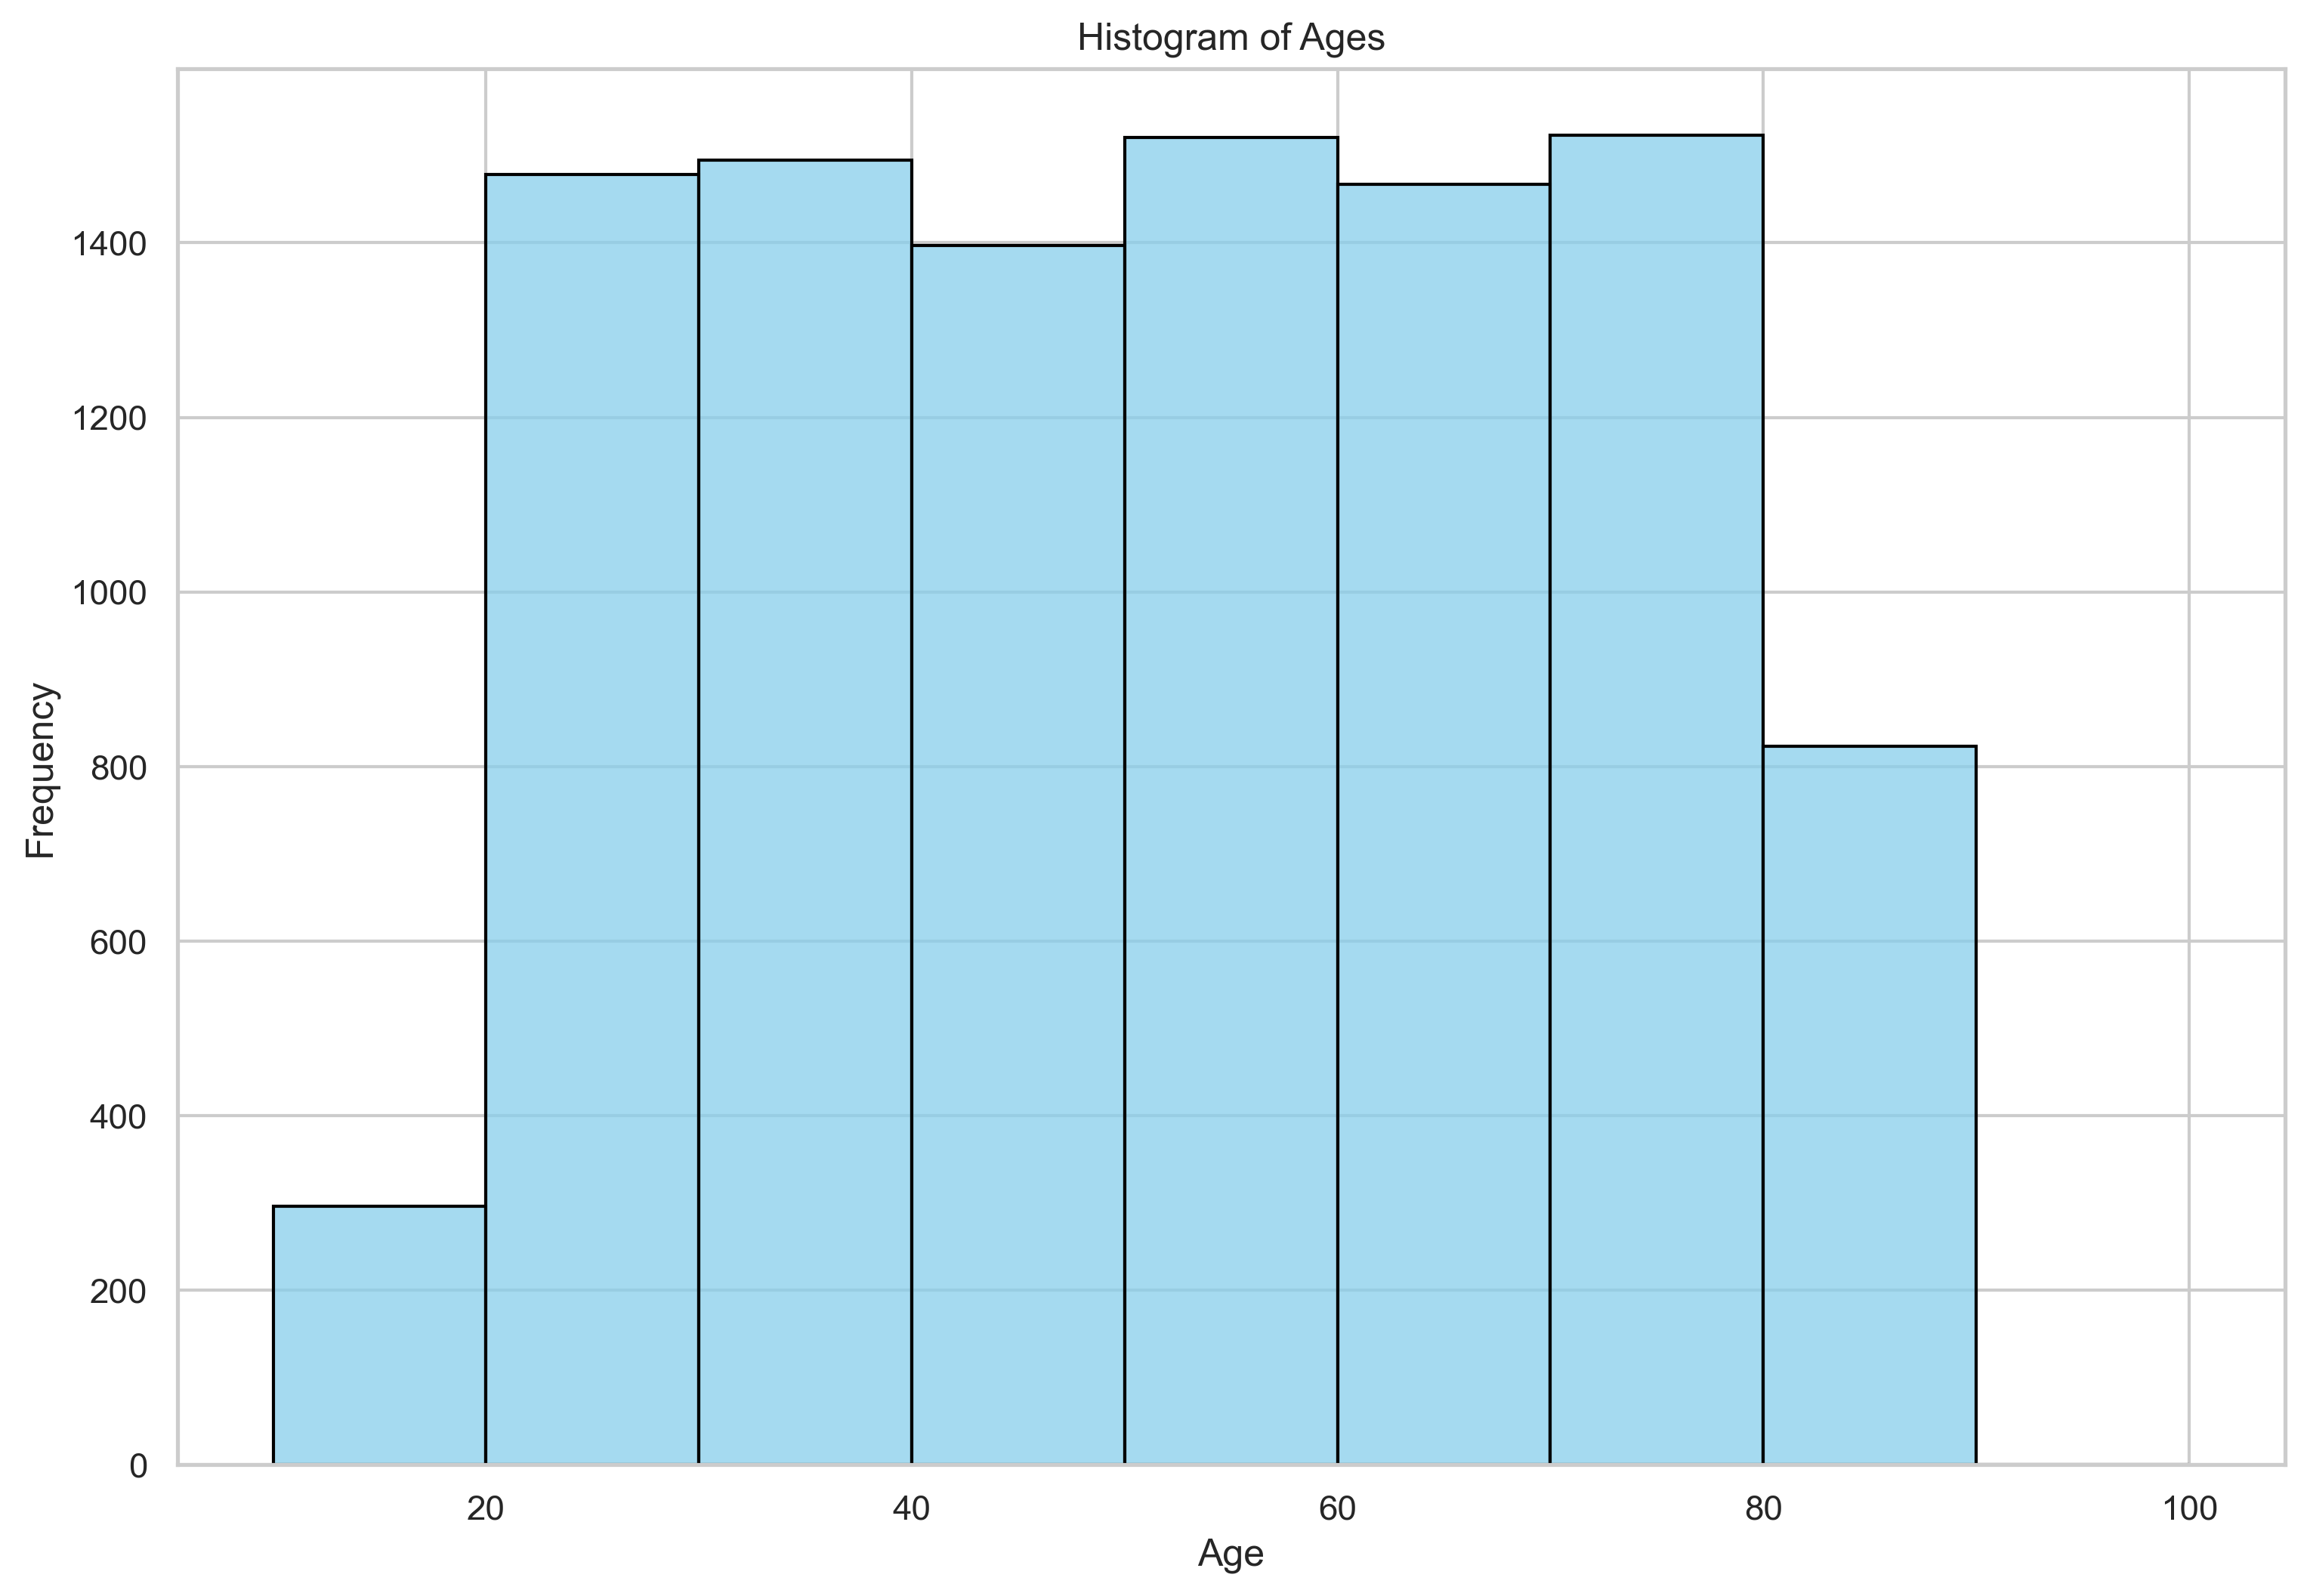

CPU times: user 885 ms, sys: 79.9 ms, total: 965 ms
Wall time: 2.33 s


In [124]:
%%time
import pandas as pd
import seaborn as sns

# Assuming you have your data stored in a CSV file 
df = pd.read_csv('data/healthcare_dataset2.csv', sep=';')

# Set the style of seaborn
#sns.set_style("whitegrid")

# Create a histogram of ages
#plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], color='skyblue', edgecolor='black')
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot

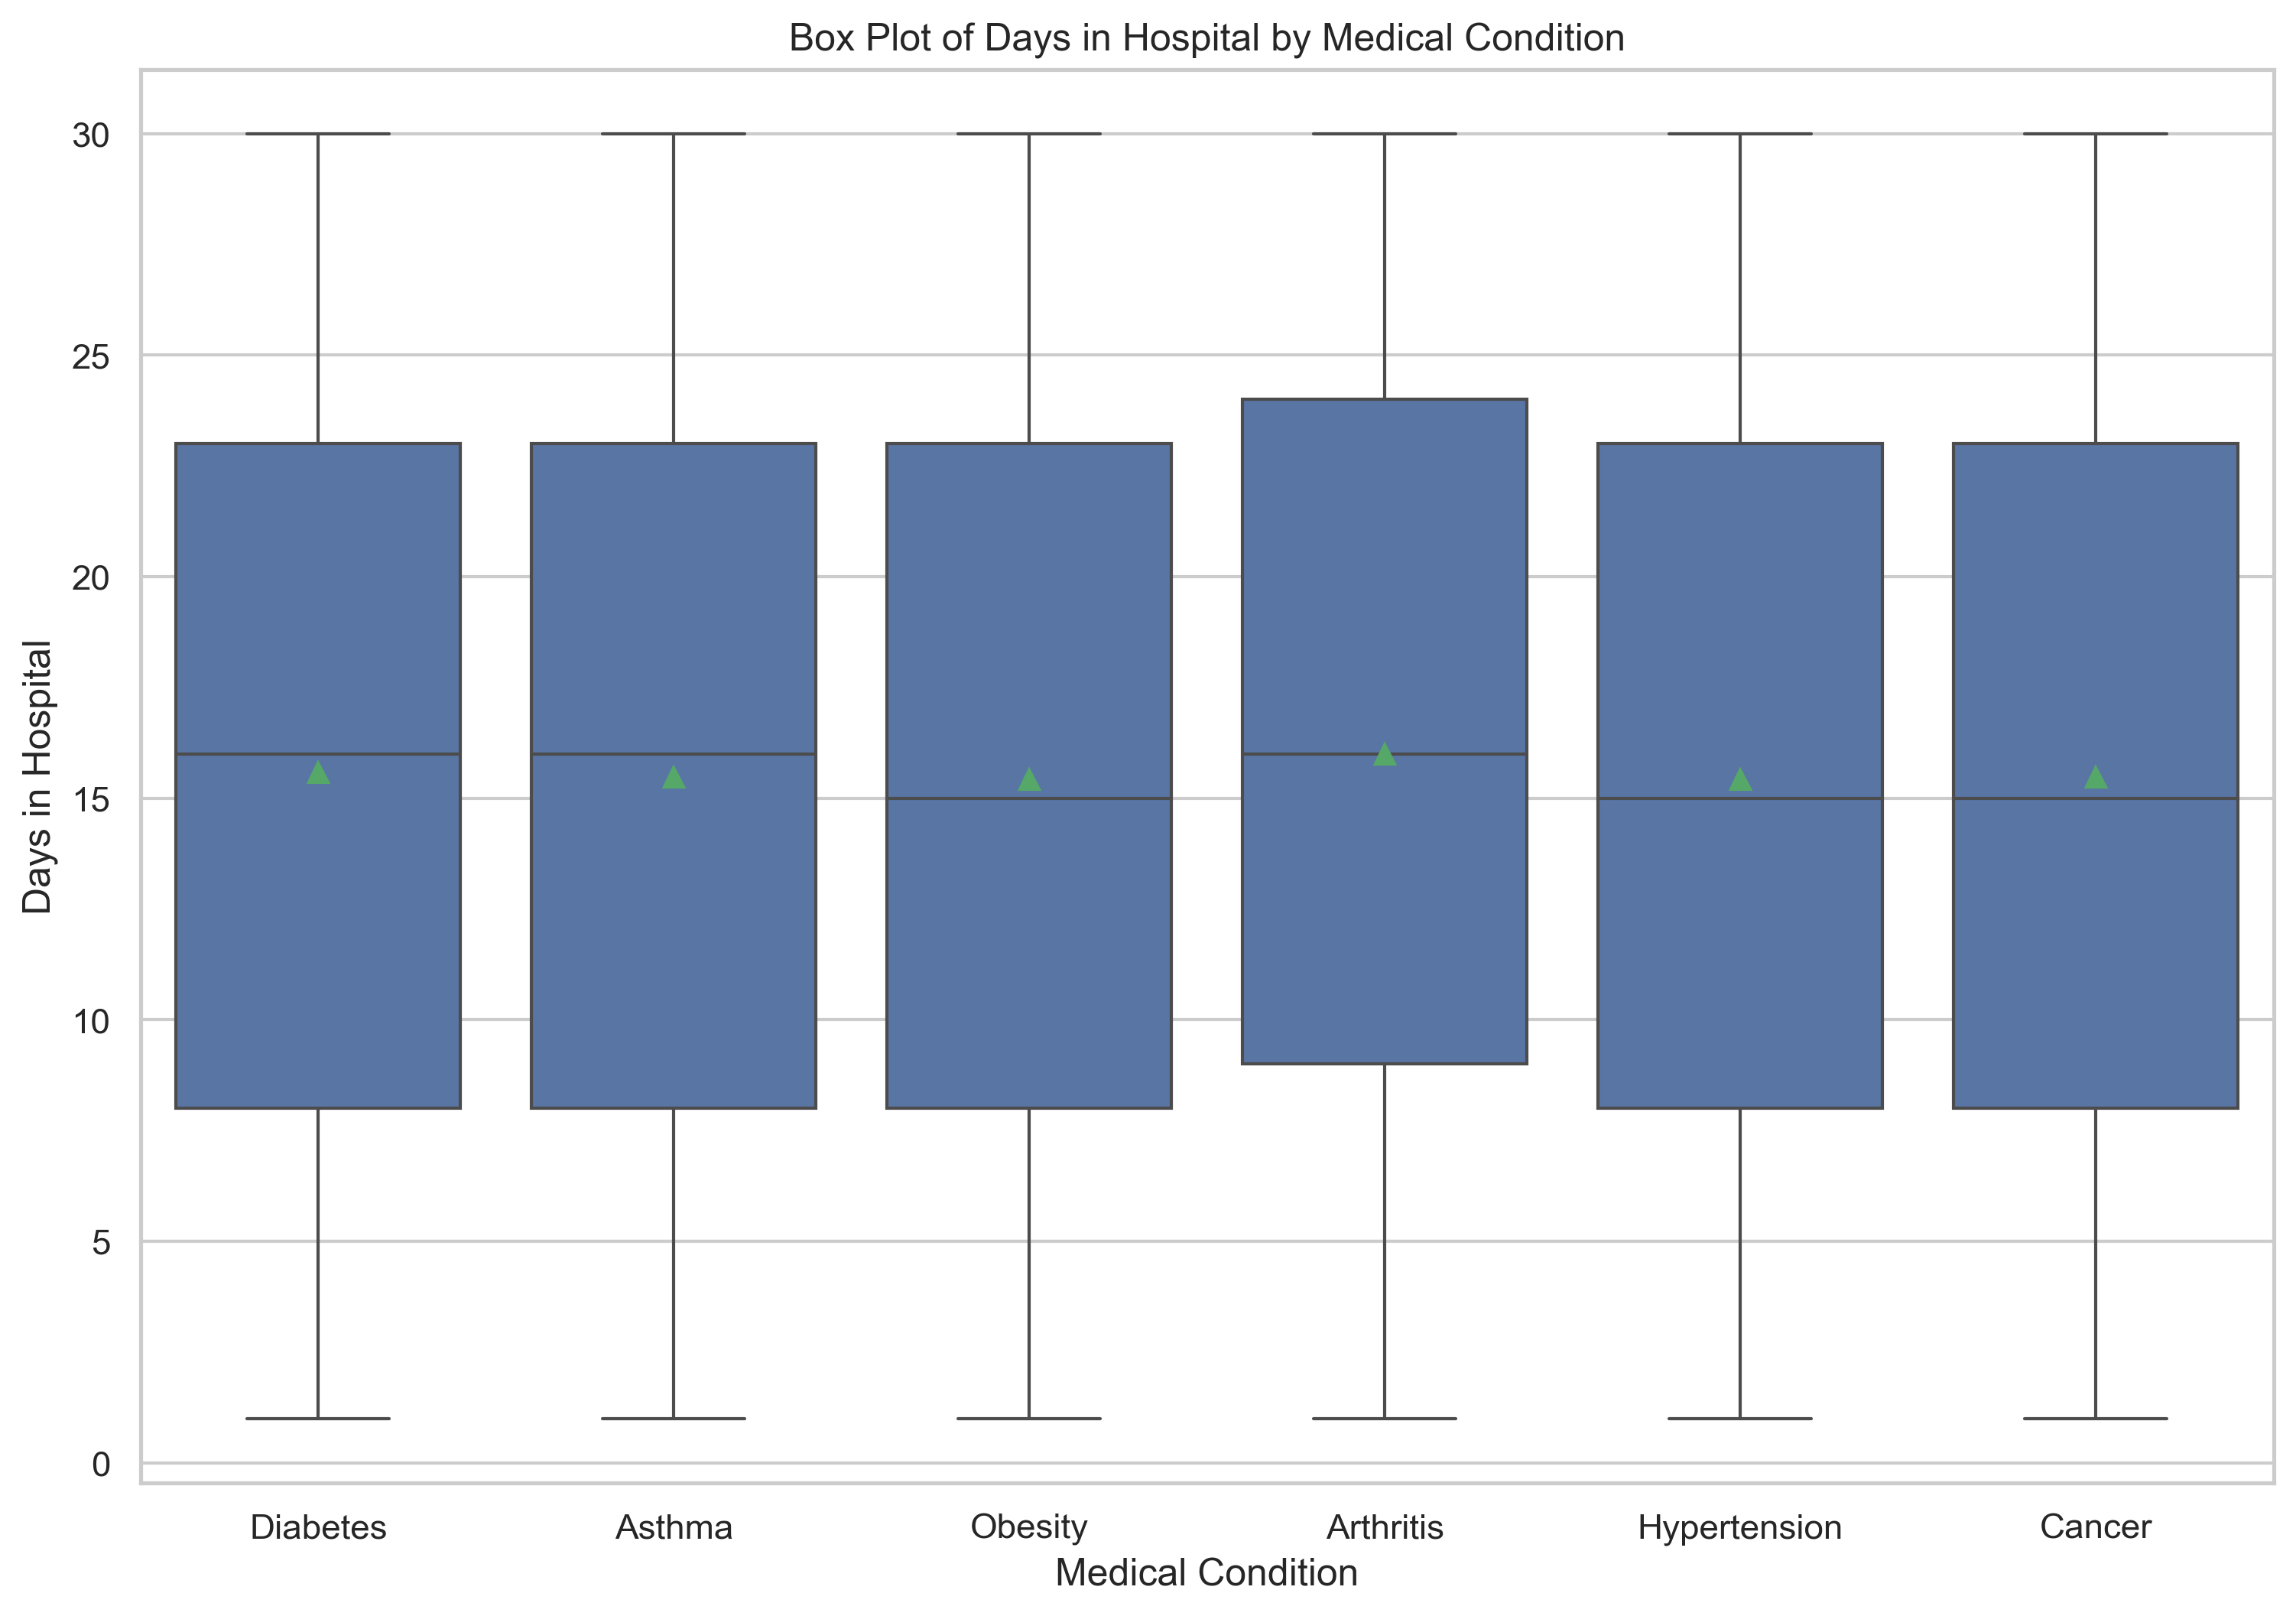

CPU times: user 629 ms, sys: 41.6 ms, total: 671 ms
Wall time: 876 ms


In [125]:
%%time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming you have your data stored in a CSV file 
df = pd.read_csv('data/healthcare_dataset2.csv', sep=';')

# Create the figure
plt.figure()

# Create boxplot
sns.boxplot(
    x = 'Medical Condition',
    y = 'Days in Hospital',
    showmeans=True,
    data=df,
    whis=1.5
)

# Set title
plt.title('Box Plot of Days in Hospital by Medical Condition')
plt.show()

# Violin plot

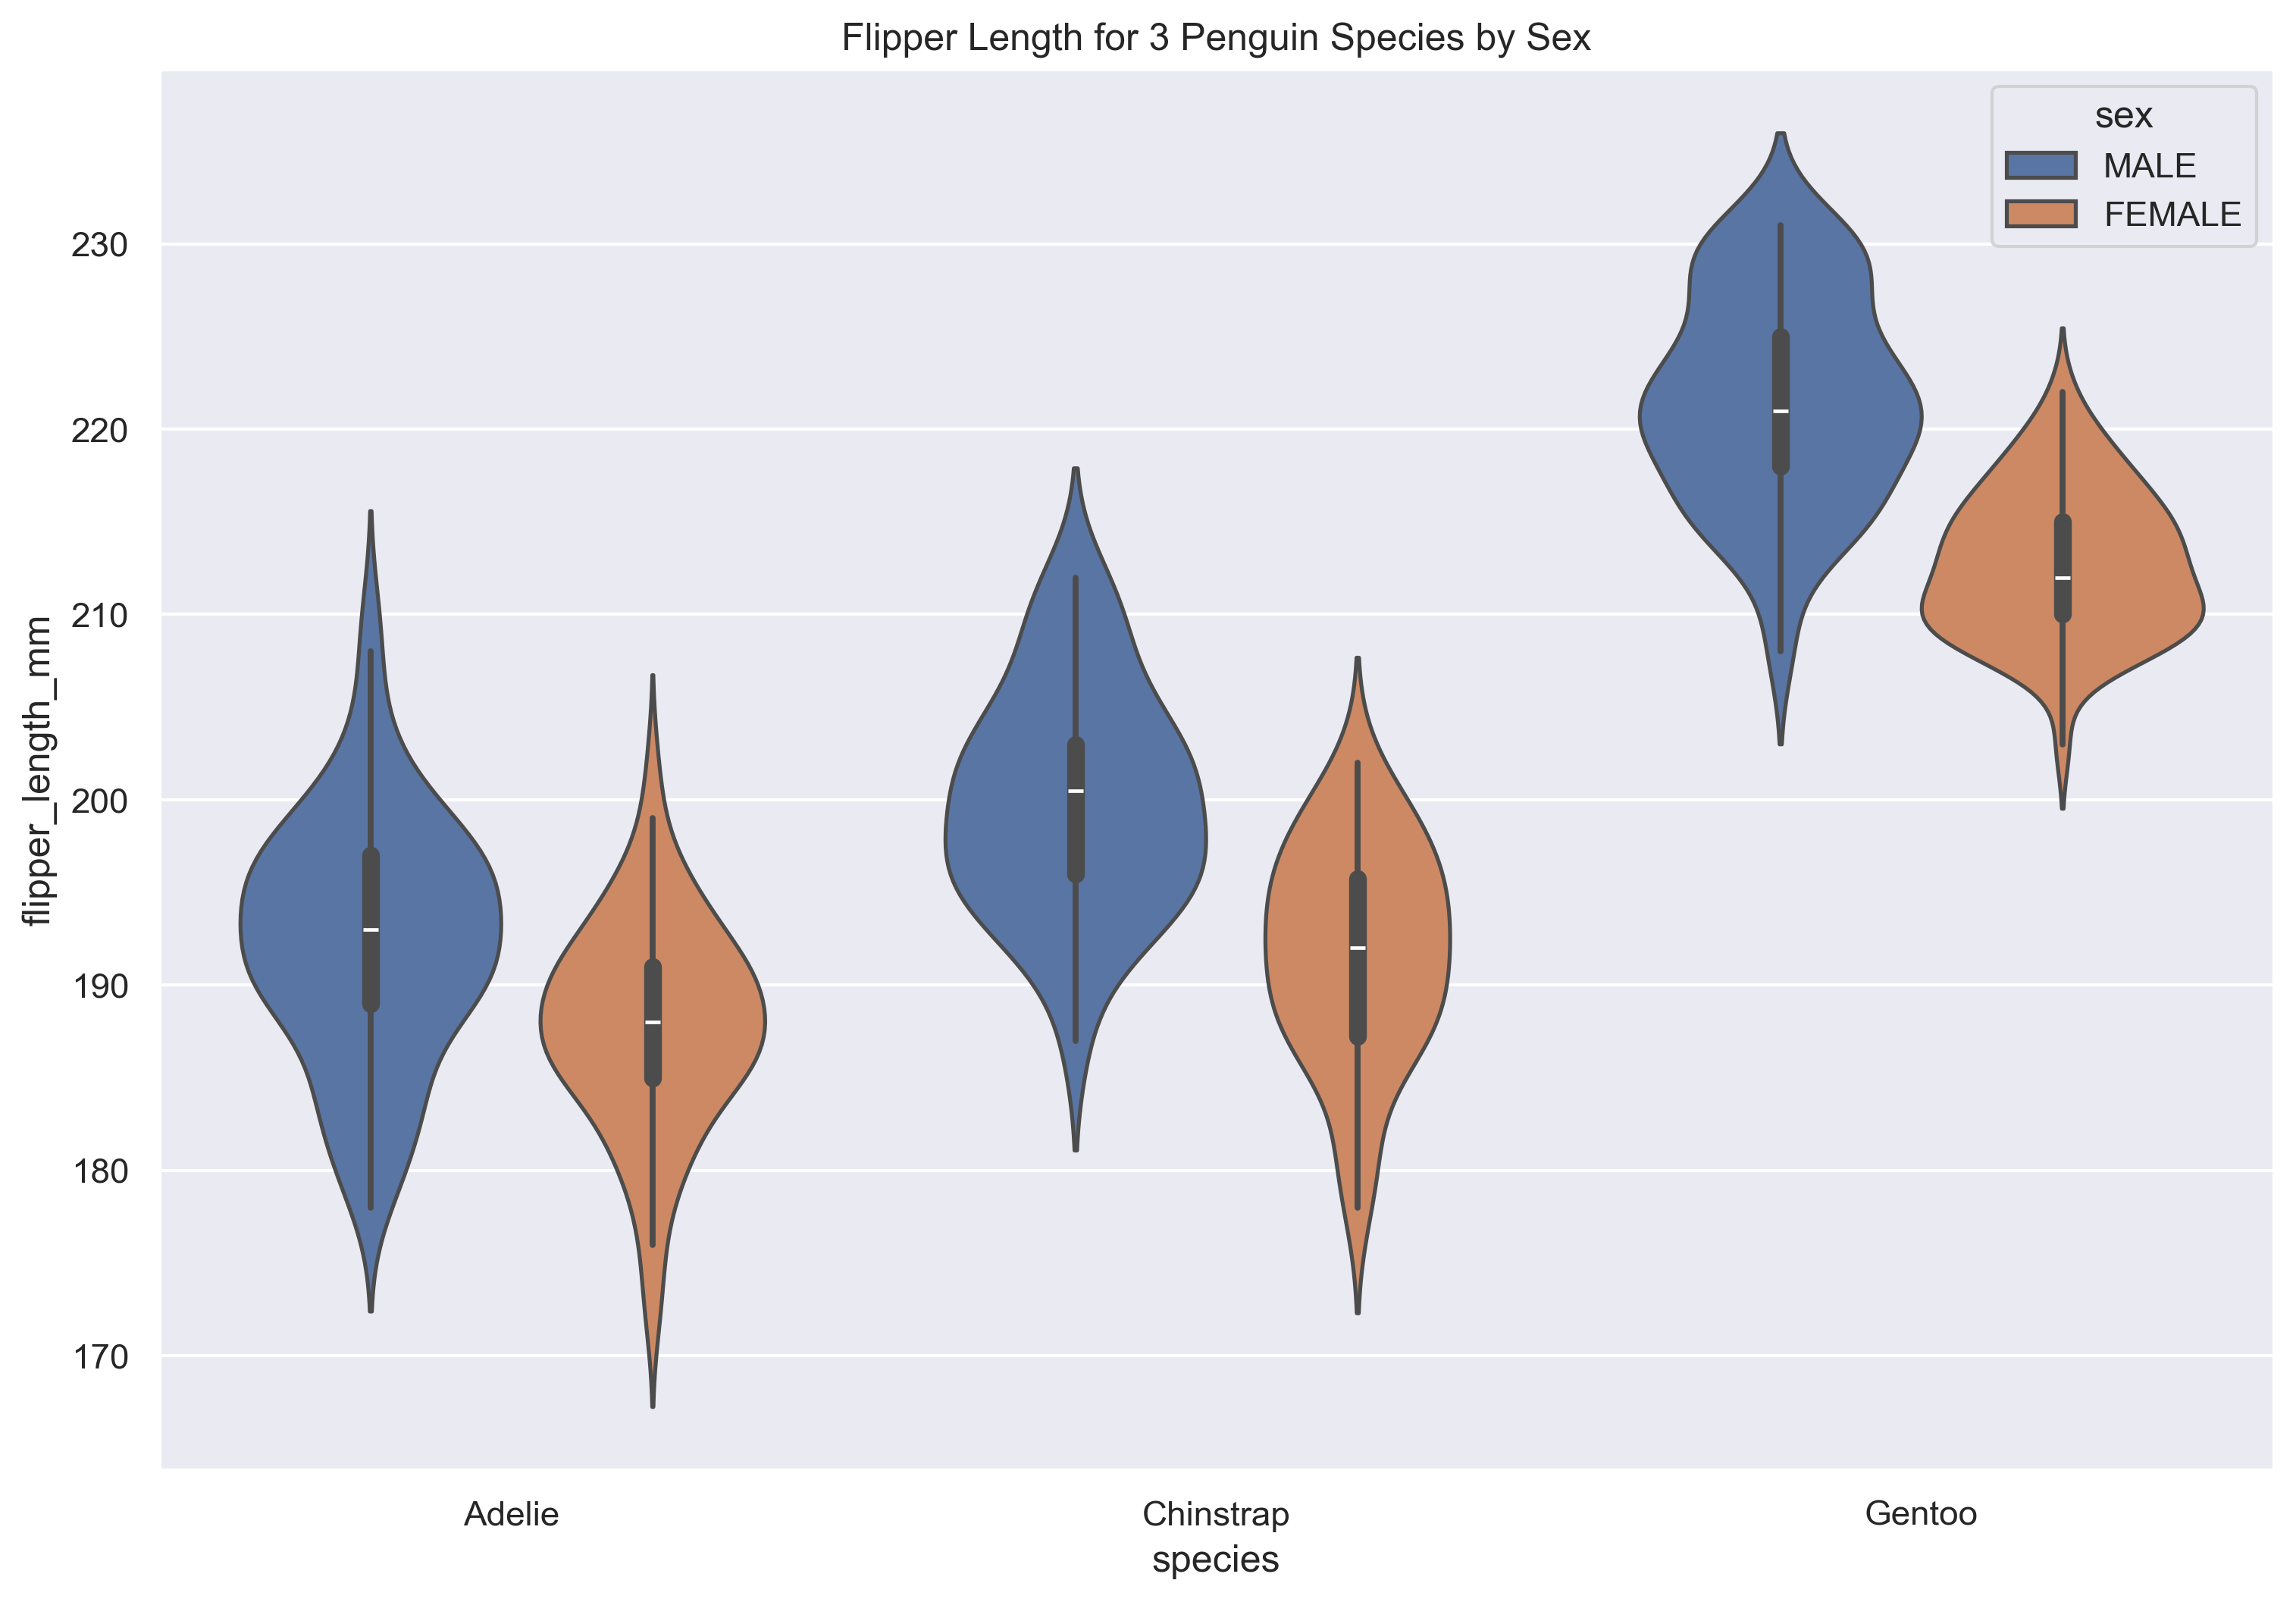

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/penguins.csv")
sns.violinplot(x = "species", y = "flipper_length_mm", data = data, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex")
plt.show()

# Ridge plot

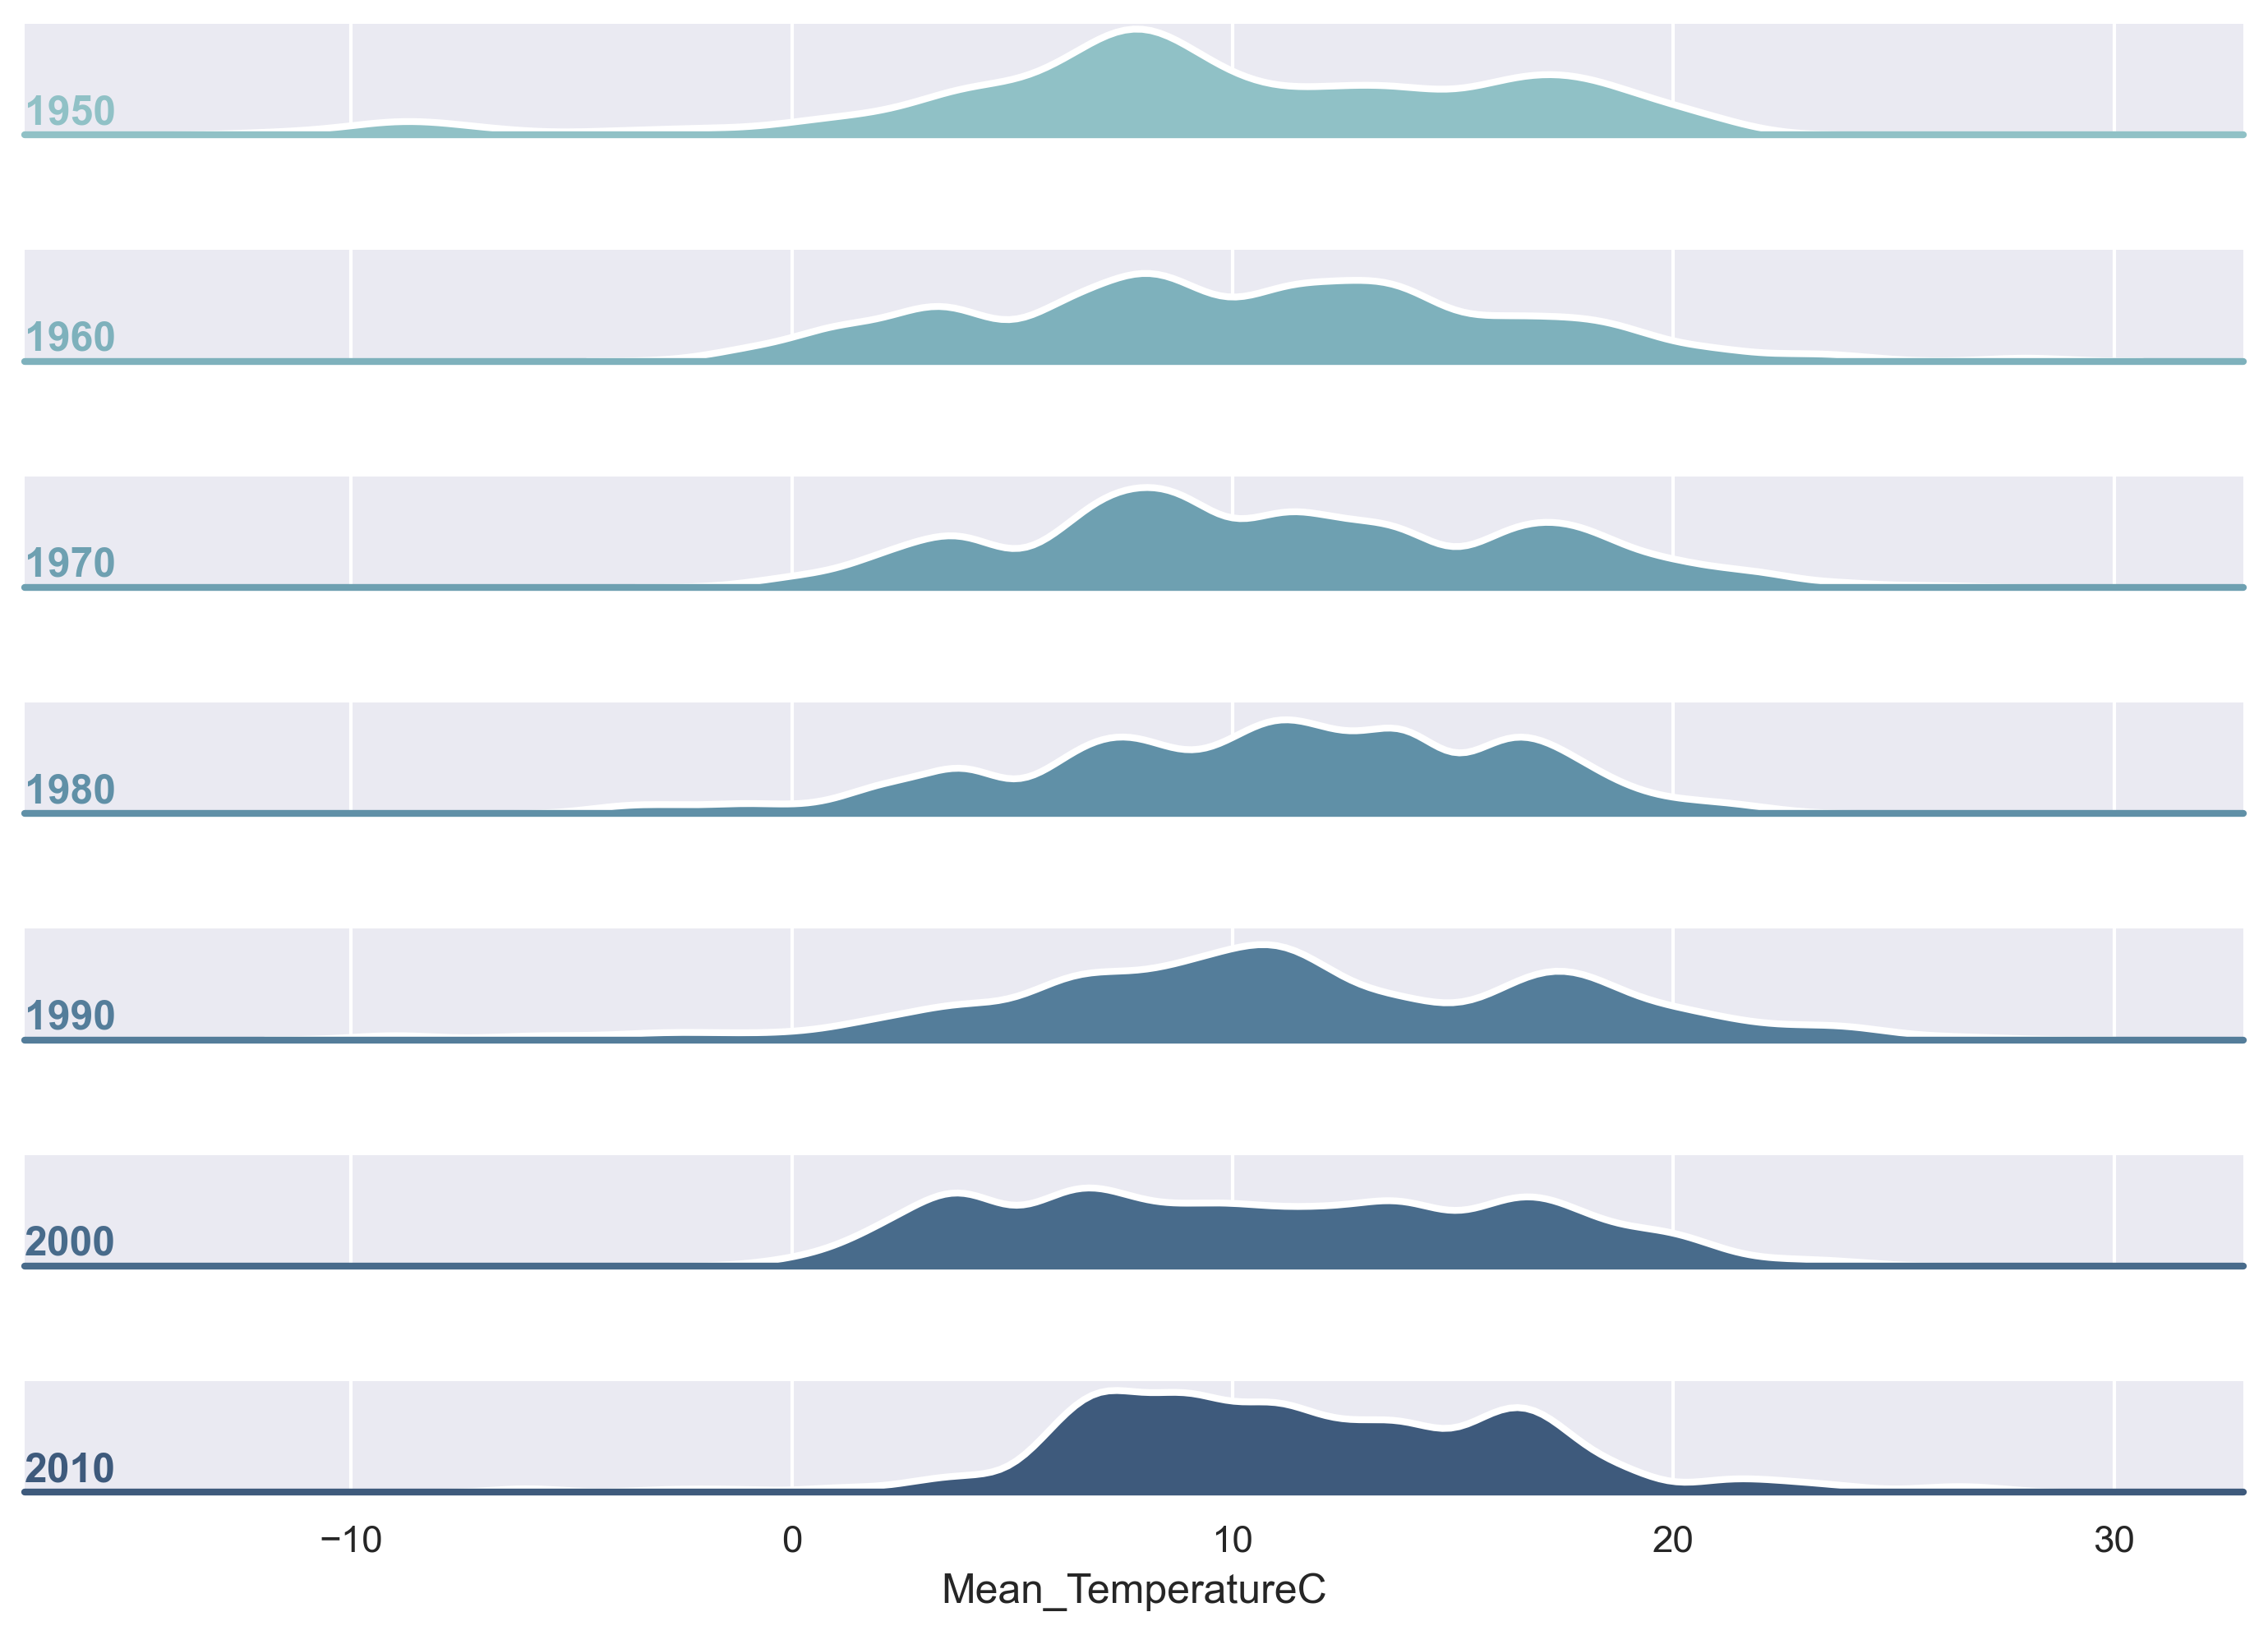

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# getting the data
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['year'] = pd.to_datetime(temp['Date']).dt.year # we store the year in a separate column

# Select years to plot
year_list = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
temp = temp[temp['year'].isin(year_list)]

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(temp, row="year", hue="year", aspect=10, height=1, palette=pal)  # Increase the height parameter

# Draw the densities in a few steps
g.map(sns.kdeplot, "Mean_TemperatureC",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Mean_TemperatureC", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Mean_TemperatureC")


# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)


plt.show()

# Kategorické vizualizace

# Bar chart

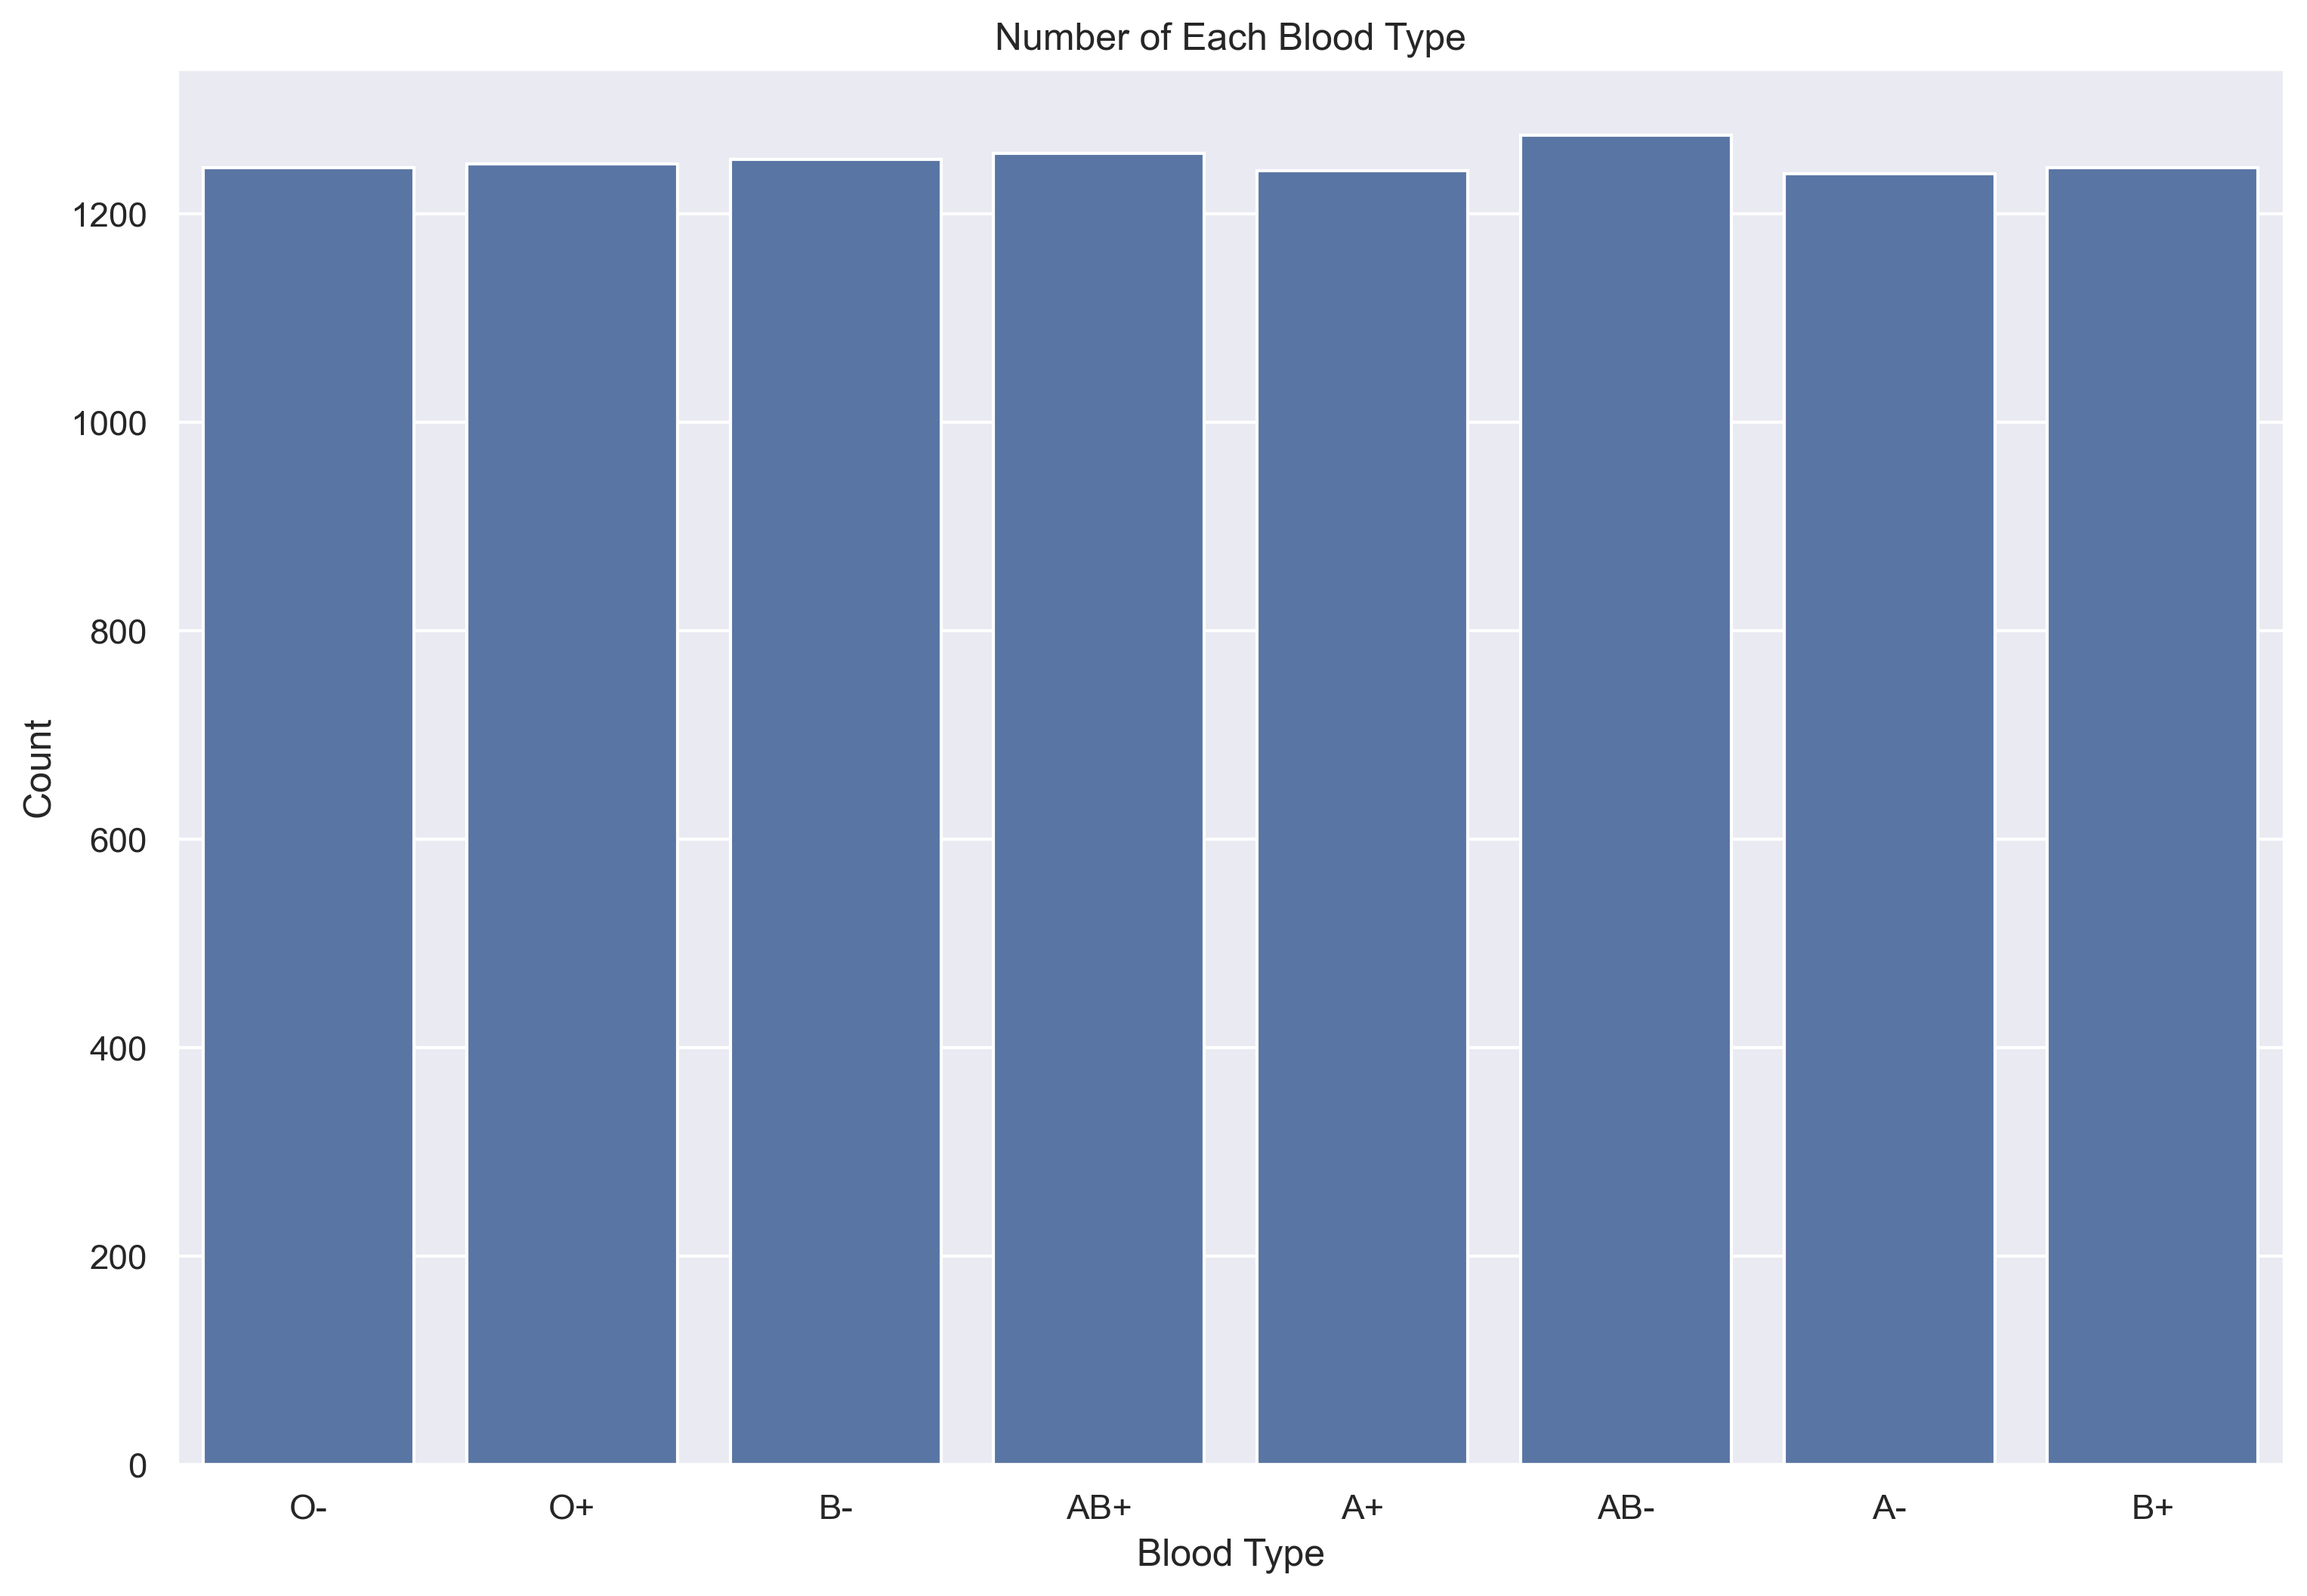

CPU times: user 764 ms, sys: 57.3 ms, total: 821 ms
Wall time: 1.81 s


In [123]:
%%time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data stored in a CSV file 
df = pd.read_csv('data/healthcare_dataset2.csv', sep=';')

# Create a bar chart using Seaborn
#plt.figure(figsize=(8, 6))
sns.countplot(x='Blood Type', data=df)

# Add labels and title
plt.title('Number of Each Blood Type')
plt.xlabel('Blood Type')
plt.ylabel('Count')

# Show plot
plt.show()


# Grouped bar chart

Text(0.5, 1.0, 'Mean Flipper Length for 3 Penguin Species by Sex')

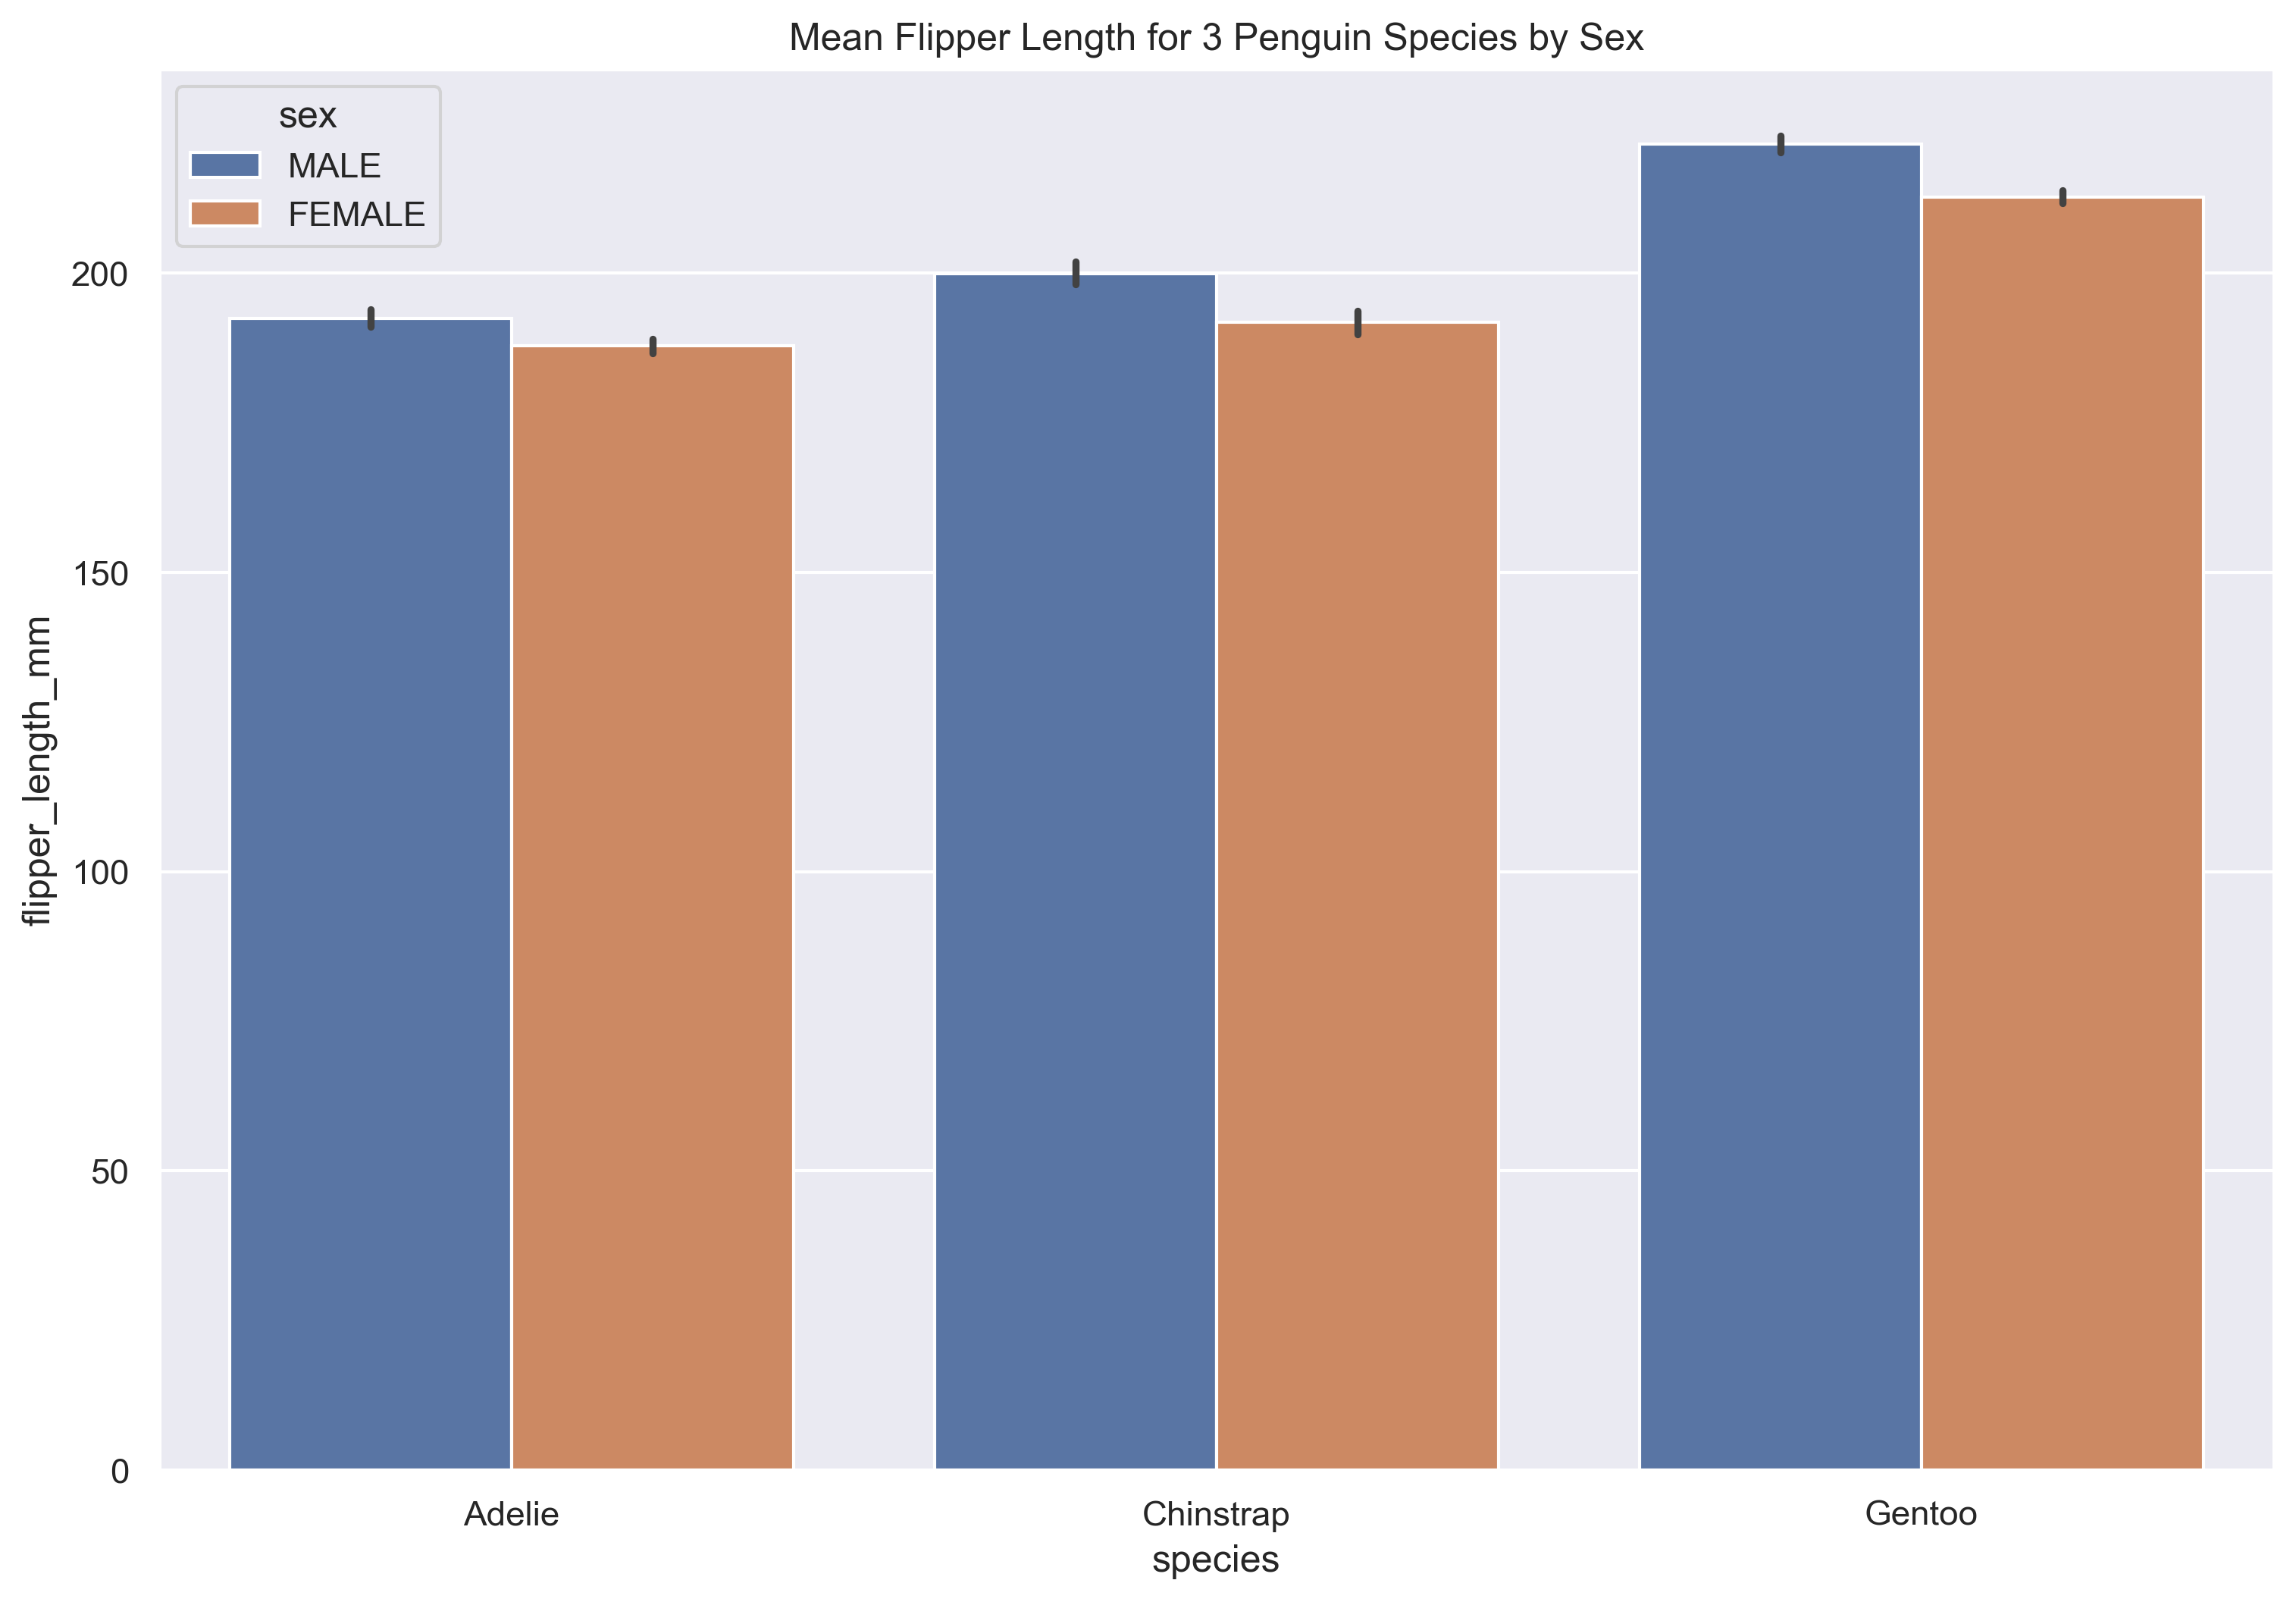

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/penguins.csv')

sns.barplot(x = "species", y = "flipper_length_mm", data = data, hue = "sex")
plt.title("Mean Flipper Length for 3 Penguin Species by Sex")

# Stacked bar chart

Text(0, 0.5, 'Percentage Ranges')

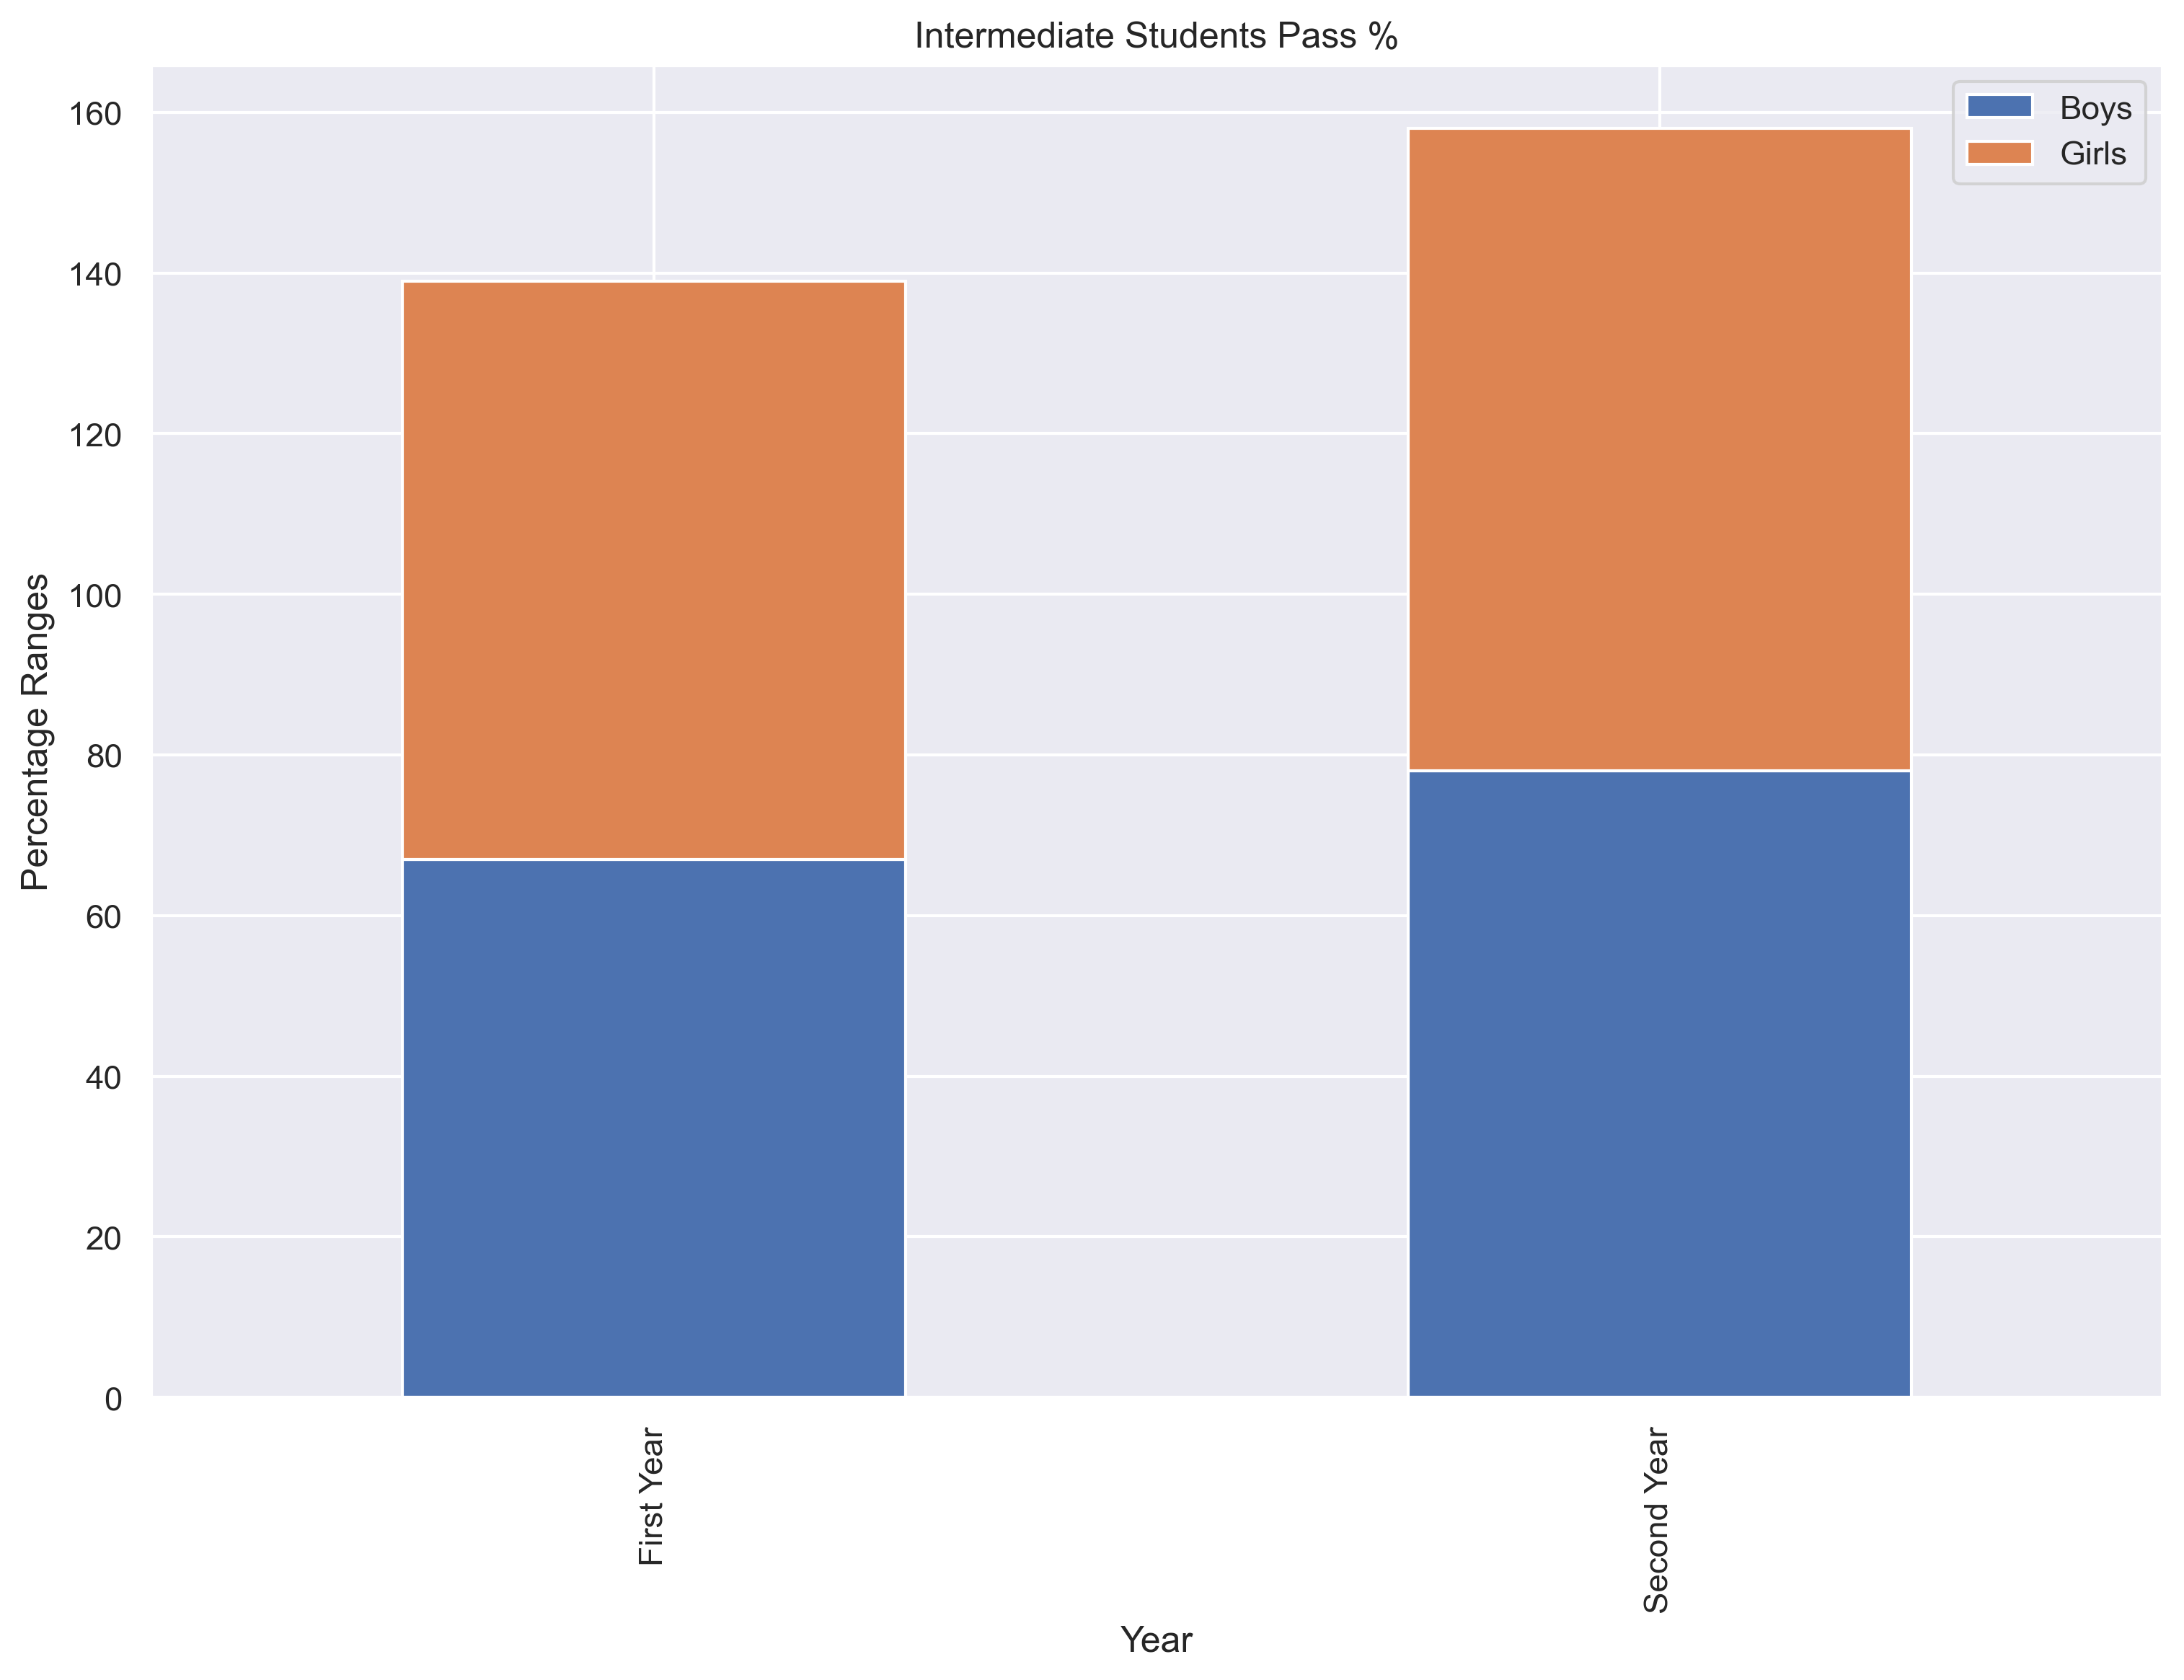

In [137]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create DataFrame
students = pd.DataFrame({"Boys": [67, 78],
						"Girls": [72, 80], },
						index=["First Year", "Second Year"])

# create stacked bar chart for students DataFrame
students.plot(kind="bar", stacked=True, fill="gender")

# Add Title and Labels
plt.title("Intermediate Students Pass %")
plt.xlabel("Year")
plt.ylabel("Percentage Ranges")


# Hierarchické vizualizace

# Heatmap

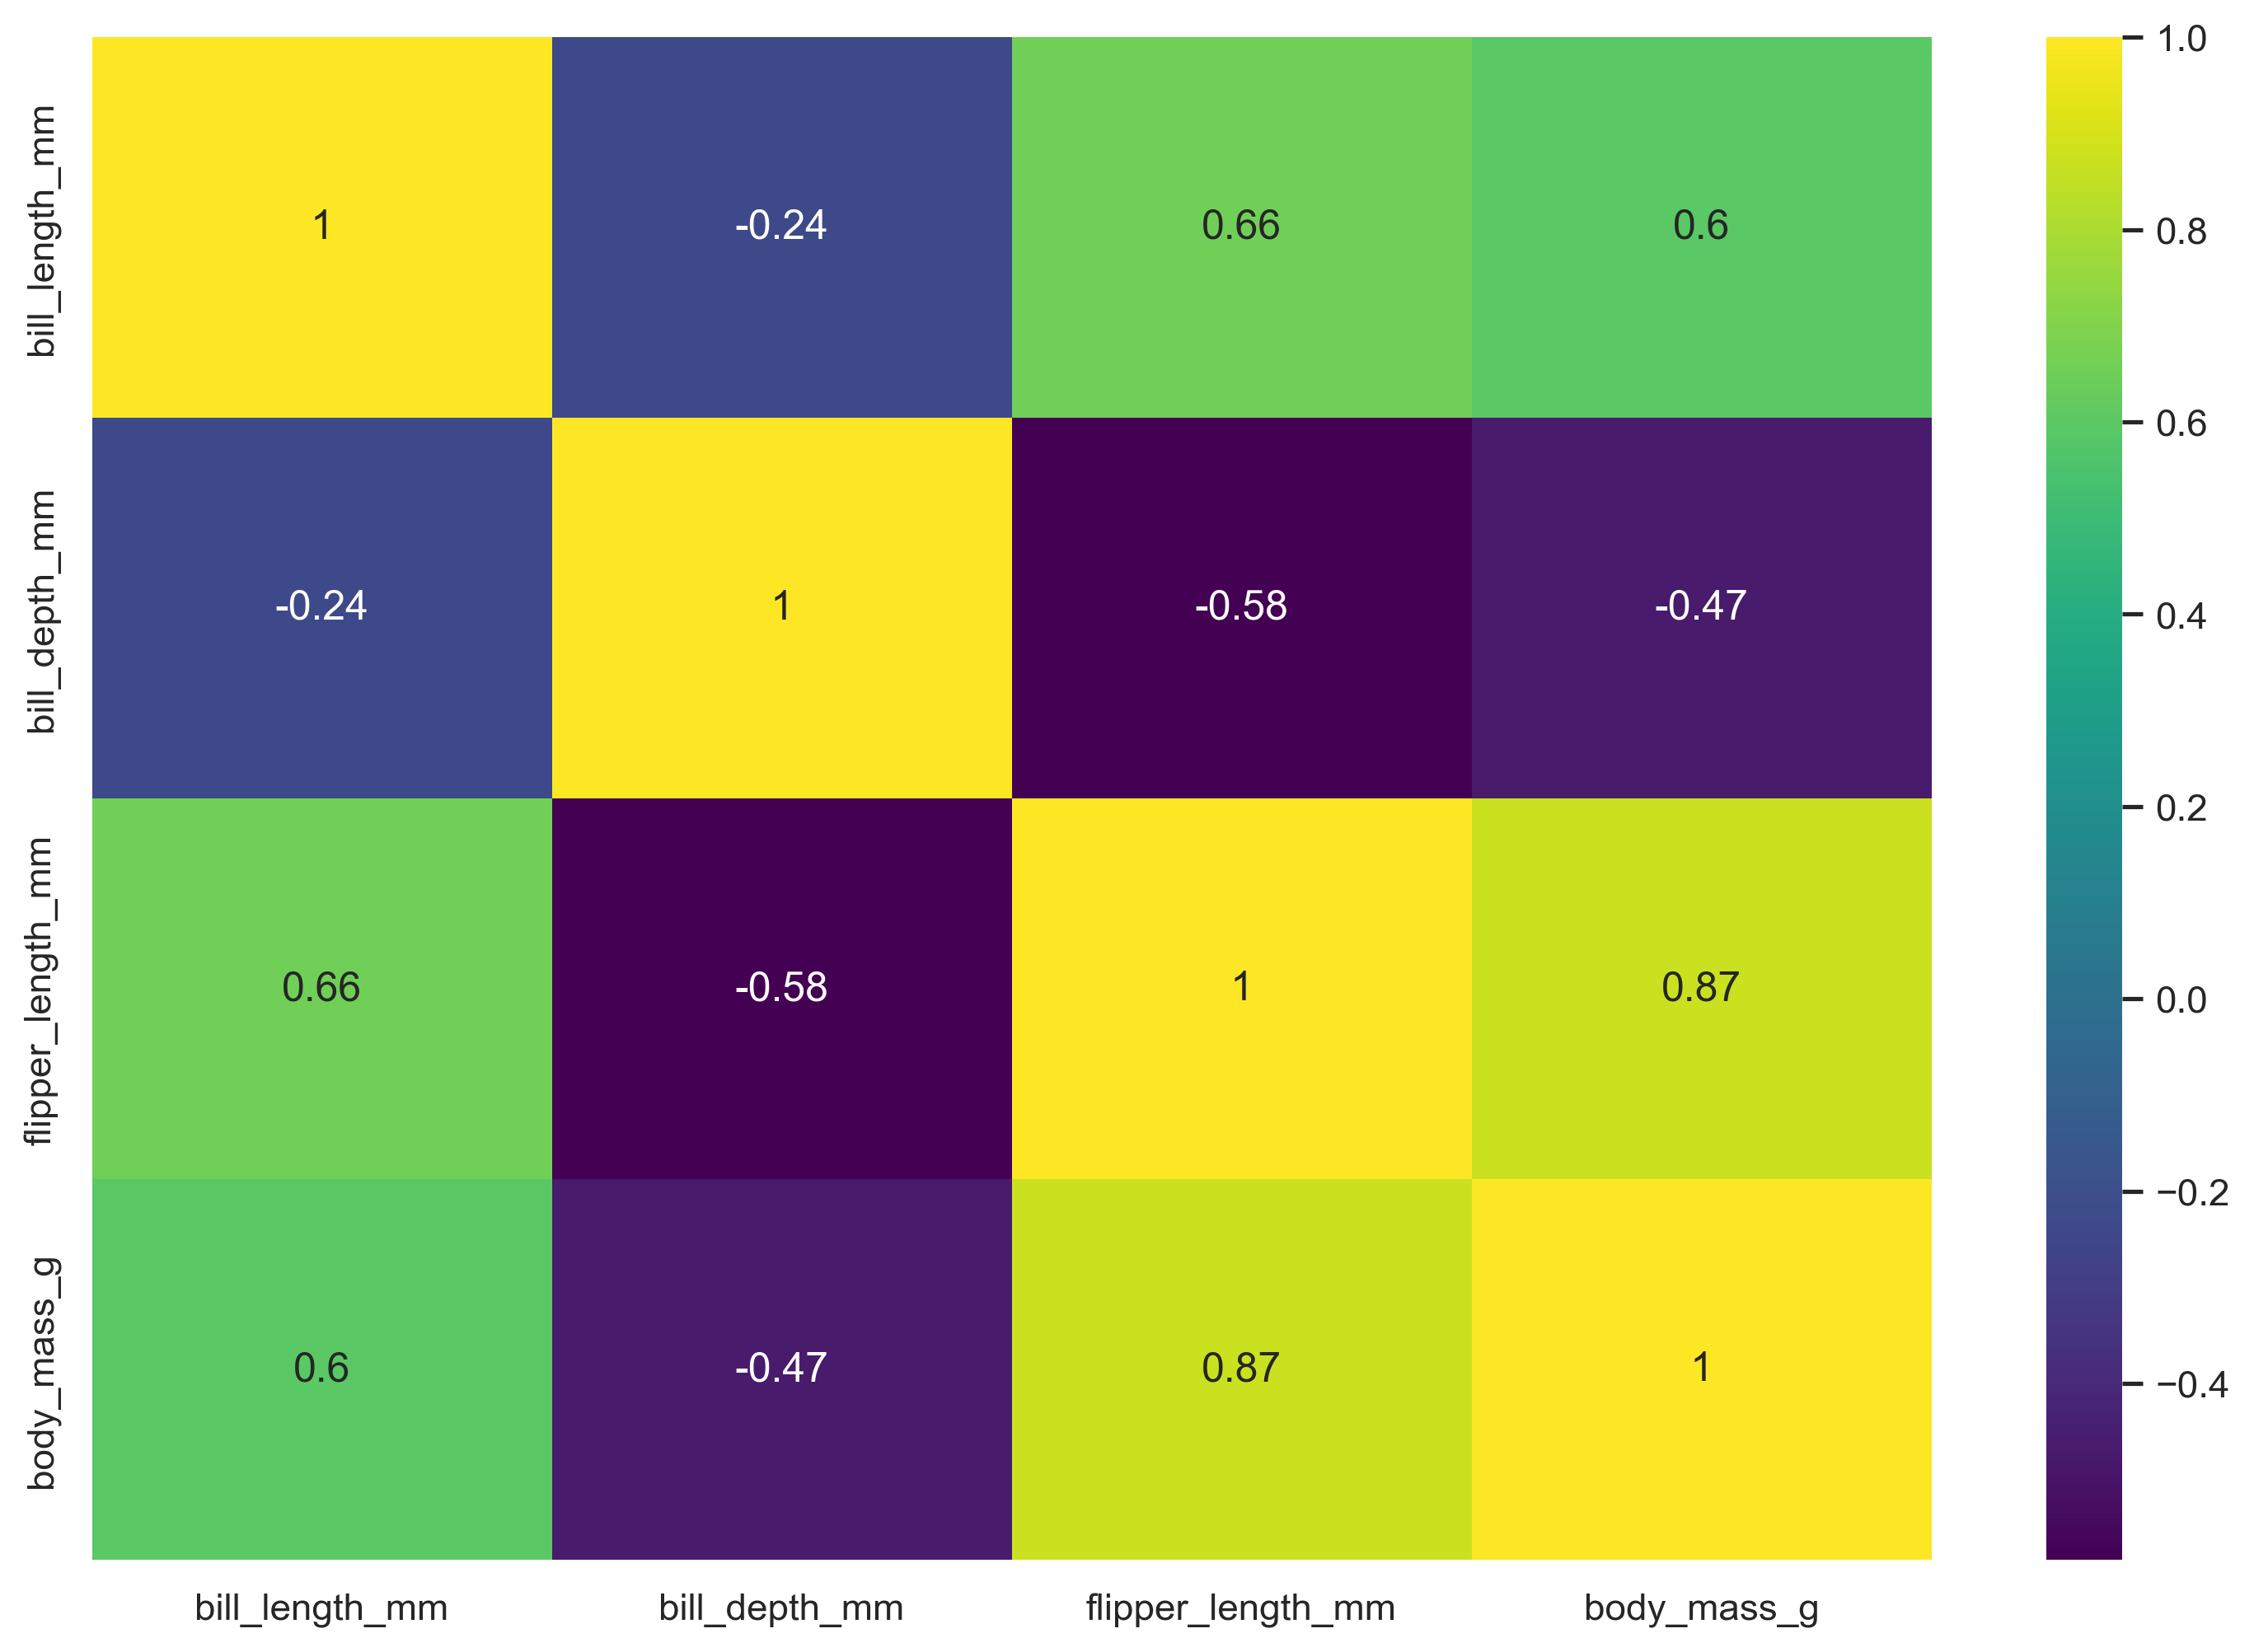

In [128]:
import numpy as np

df = pd.read_csv("data/penguins.csv")

# Extract numeric columns for heatmap
numeric_data = df.select_dtypes(include=[np.number])

# Create a correlation matrix
corr_matrix = numeric_data.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="viridis")

# Show the plot
plt.show()



# Bubble chart

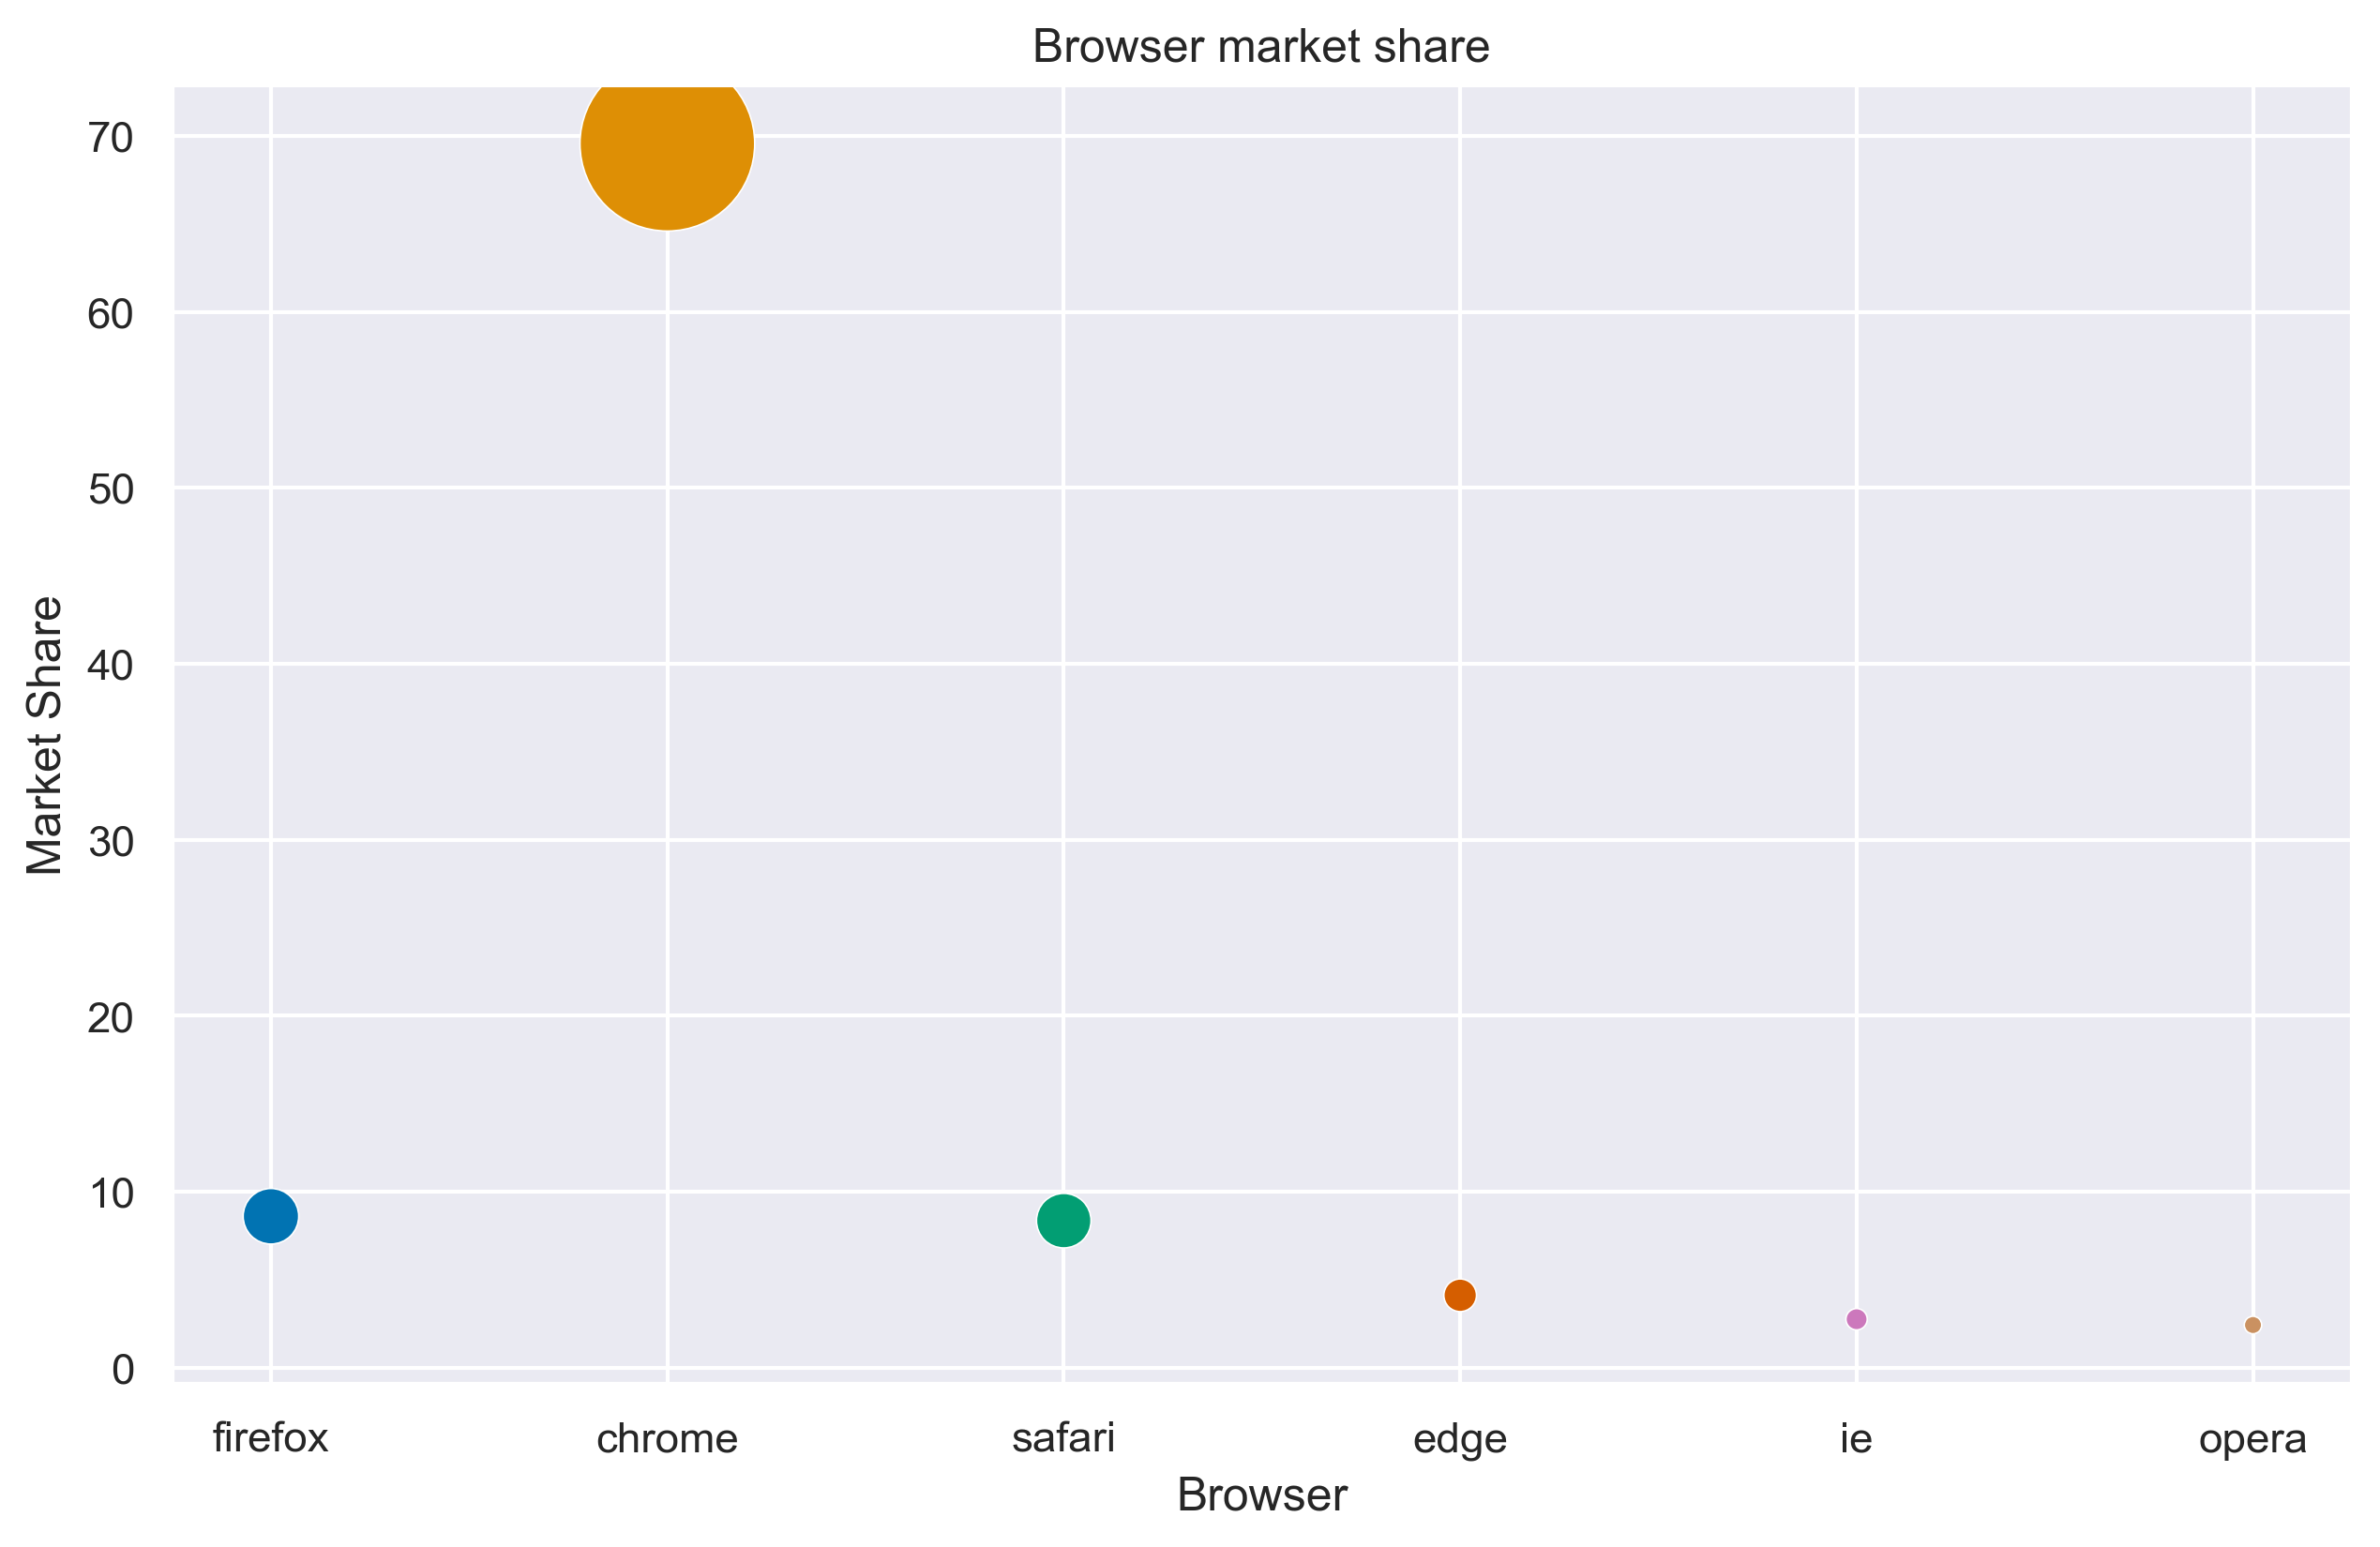

In [138]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data
browser_market_share = {
    'browsers': ['firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'],
    'market_share': [8.61, 69.55, 8.36, 4.12, 2.76, 2.43],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(browser_market_share)

# Create a bubble chart
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='browsers', y='market_share', size='market_share', hue='browsers', palette='colorblind', sizes=(20, 2000), legend=False)

# Adding title and labels
plt.title('Browser market share')
plt.xlabel('Browser')
plt.ylabel('Market Share')

plt.show()